
### Importing the neccessary libraries


In [1]:
import pandas as pd
from datetime import datetime
import re
from collections import Counter
import plotly
from nltk.probability import FreqDist
import re
import pandas as pd

import folium
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import plotly.express as px
from nltk import FreqDist
import numpy as np
import seaborn as sns

### Reading the dataset

In [2]:
file_path = 'all_job_postings_9517.csv'
df = pd.read_csv(file_path)
df_may_2022 = pd.read_csv('naukri_data_science_jobs_india_may_2022.csv')
df_nov_2022 = pd.read_csv('naukri_Nov_2022.csv')
df_2023 = pd.read_csv('all_job_postings_9517.csv')



In [3]:
# displaying the first 5 rows of the dataset
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  
0  Key Skills\nUnixLinuxStaffingTime managementPr...  
1  Key Skills\njQuerySilverlightMySQLSSRSJavascri...  
2  Key Skills\nSkills highlighted with ‘‘ are pre...  
3  Key Skills\nData analysisLeadership developmen...  
4  Key Skills\nData analysisWeb analyticsSocial m...

###  Data Cleaning and Wrangling

#### Drop Duplicate Values

In [4]:
df = df.drop_duplicates()
df_2023 = df_2023.drop_duplicates()

#### Handling missing values

In [5]:
df.isnull().sum()

Job Title:             226
Company Name:          179
Job Location:            0
Job Experience           0
Job Salary               0
Job Stats                0
Job Description:         0
Industry Type:           0
Required Education:      0
Key Skills:              0
dtype: int64

In [6]:
# Filter rows where 'title' is null
null_title_rows = df[df['Job Title:'].isnull()]

#### Replace job titles of null value with the mode from dataset

In [7]:
# Since Job Title is categorical we are replacing null values with most common occuring job titles(mode)

mode_job_title = df['Job Title:'].mode()[0]
df['Job Title:'].fillna(mode_job_title, inplace=True)

In [8]:
df.isnull().sum()

Job Title:               0
Company Name:          179
Job Location:            0
Job Experience           0
Job Salary               0
Job Stats                0
Job Description:         0
Industry Type:           0
Required Education:      0
Key Skills:              0
dtype: int64

In [9]:
# Since we are dealing with skills and job postings so company name is not important, so we disregarded null values
# company name column

#### Replace "SQL" with "Sql" for extraction of texts based on First Capital letters 

In [10]:
df["Key Skills:"] = df["Key Skills:"].str.replace("SQL", "Sql")

#### Parse skills based on first capital letter to extract keywords

In [11]:
def split_skills(skills_string):
    skills_list = re.split(r'(?<=[a-z])(?=[A-Z])|\n', skills_string)
    # Filter out empty strings and whitespace
    skills_list = [skill.strip() for skill in skills_list if skill.strip()]
    return skills_list

# Remove "Key Skills\n" from skills string
df['Key Skills:'] = df['Key Skills:'].str.replace('Key Skills\n', '')
df['key_skills_seperated'] = df['Key Skills:'].apply(split_skills)

In [12]:
def split_skills(skills_string):
    skills_list = re.split(r'(?<=[a-z])(?=[A-Z])|\n', skills_string)
    # Filter out empty strings and whitespace
    skills_list = [skill.strip() for skill in skills_list if skill.strip()]
    return skills_list

# Remove "Key Skills\n" from skills string
df_2023['Key Skills:'] = df_2023['Key Skills:'].str.replace('Key Skills\n', '')
df_2023['key_skills_seperated'] = df_2023['Key Skills:'].apply(split_skills)

In [13]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated  
0  [Unix, Linux, Staffing, Time management, Proje...  
1  [j, Query, Silverlight, My, Sql, SSRSJavascrip...  
2  [Skills highlighted with ‘‘ are preferred keys...  
3  [Data analysis, Leadership development, CSRExc...  
4  [Data analysis, Web analytics, Social media, S...

In [14]:
df.loc[0, 'key_skills_seperated']

['Unix',
 'Linux',
 'Staffing',
 'Time management',
 'Project management',
 'Analyticaldata visualization',
 'Bioinformatics',
 'Analytics',
 'Python']

#### Disregard any skills that their length are less than 3

In [15]:
# Function to filter strings with length >= 3
def filter_strings(strings):
    return [s for s in strings if len(s) >= 3]

# Apply the filtering function to the "Skills" column
df["key_skills_seperated"] = df["key_skills_seperated"].apply(filter_strings)


#### Add Column Date so we have data when the record was collected

In [16]:
df['Date'] = '2023-10-27'

In [17]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated        Date  
0  [Unix, Linux, Staffing, Time management, Proje...  2023-10-27  
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  2023-10-27  
2  [Skills highlighted with ‘‘ are preferred keys...  2023-10-27  
3  [Data analysis, Leadership development, CSRExc...  2023-10-27  
4  [Data analysis, Web analytics, Social media, S...  2023-10-27

In [18]:
df.describe()

Job Title:                      Company Name:  \
count             8116                               7937   
unique            4895                               3937   
top     Data Scientist  Coders Brain Pvt Ltd3.926 Reviews   
freq               497                                 63   

              Job Location: Job Experience     Job Salary  \
count                  8116           8116           8116   
unique                  856            148            302   
top     Bangalore/Bengaluru    2 - 5 years  Not Disclosed   
freq                   1547            466           7095   

                                                Job Stats  \
count                                                8116   
unique                                               4179   
top     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
freq                                                  216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     Developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     Role: Data Analyst\nIndustry Type: IT Services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     Education\nUG: Any Graduate\nPG: Any Postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6818   
top     Help DeskCustomer Servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  
count                                                8116        8116  
unique                                               6817           1  
top     [Help Desk, Customer Servicedata analysiscusto...  2023-10-27  
freq                                                   41        8116

In [19]:
# Step 1: Flatten the lists in the "Skills" column into a single list
all_skills = [skill for sublist in df["key_skills_seperated"] for skill in sublist]

# Step 2: Count the frequency of each string
skill_counts = Counter(all_skills)



In [20]:
len(skill_counts)

10725

In [21]:
count = sum(1 for value in skill_counts.values() if value == 1)

print(f"Number of keys with a value of 1: {count}")

Number of keys with a value of 1: 6389


In [22]:
count = sum(2 for value in skill_counts.values() if value == 2)

print(f"Number of keys with a value of 1: {count}")

Number of keys with a value of 1: 3788


In [23]:
# Create a new dictionary with key-value pairs where the value is >= 3
filtered_dict = {key: value for key, value in skill_counts.items() if value >= 30}
filtered_counter = Counter(filtered_dict)

In [24]:
# Step 3: Get the top 10 most common strings
top_10_skills = filtered_counter.most_common(10)
bottom_10_skills = filtered_counter.most_common()[:-10:-1]
print("top_10_skills\n", top_10_skills)
print()
print("bottom_10_skills\n", bottom_10_skills)

top_10_skills
 [('Data analysis', 2826), ('Skills highlighted with ‘‘ are preferred keyskills', 1993), ('Sql', 1803), ('Python', 1527), ('Analytical', 984), ('Analytics', 845), ('Monitoring', 614), ('Machine learning', 594), ('Excel', 459), ('Management', 447)]

bottom_10_skills
 [('Market intelligence', 30), ('MIS', 30), ('Investment banking', 30), ('Employee engagement', 30), ('MS Office Word', 30), ('Mining', 31), ('Google Ad', 31), ('Data Engineering', 31), ('MS Access', 31)]


In [25]:
df['key_skills_seperated']

0       [Unix, Linux, Staffing, Time management, Proje...
1       [Query, Silverlight, Sql, SSRSJavascript, PHPW...
2       [Skills highlighted with ‘‘ are preferred keys...
3       [Data analysis, Leadership development, CSRExc...
4       [Data analysis, Web analytics, Social media, S...
                              ...                        
8969    [Skills highlighted with ‘‘ are preferred keys...
8970    [Skills highlighted with ‘‘ are preferred keys...
8972    [BPOAccountancy, Tally, Analytical, Back offic...
8974    [Valuation analysis, Data analysis, Interperso...
8975    [Process Associate, Automationdata sciencedata...
Name: key_skills_seperated, Length: 8116, dtype: object

In [26]:
df.columns

Index(['Job Title:', 'Company Name:', 'Job Location:', 'Job Experience',
       'Job Salary', 'Job Stats', 'Job Description:', 'Industry Type:',
       'Required Education:', 'Key Skills:', 'key_skills_seperated', 'Date'],
      dtype='object')

In [27]:
# Define a function to remove specific words or phrases from the list
words_to_remove = [
        'Data analysis',
        'Skills highlighted with ‘‘ are preferred keyskills',
        'Analytical',
        'Analytics',
        'Monitoring',
        'Management',
        'Computer science',
        'Mining',
        'Google Ad',
        'Instrumentation',
        'Data Analysis',
        'Data Analyst'
    ]
def remove_words_from_list(skill_list, words_to_remove):
    # List of words to remove
    
    return [skill for skill in skill_list if skill not in words_to_remove]




In [28]:
df["key_skills_seperated_cleaned"] = df["key_skills_seperated"].apply(remove_words_from_list, words_to_remove=words_to_remove)

In [29]:

df.head(3)

Job Title:                  Company Name:  \
0         Sr. Data Scientist                       Skillety   
1          Software Engineer  Talent Software4.1120 Reviews   
2  Data Analyst - WealthTech           Mithra HR Consulting   

         Job Location: Job Experience     Job Salary  \
0  Bangalore/Bengaluru  10 - 15 years  Not Disclosed   
1  Bangalore/Bengaluru    2 - 4 years  Not Disclosed   
2         Mumbai, Pune    3 - 7 years  Not Disclosed   

                                           Job Stats  \
0  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2              Posted: 29 days ago\nApplicants: 1161   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   

                                key_skills_seperated        Date  \
0  [Unix, Linux, Staffing, Time management, Proje...  2023-10-27   
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  2023-10-27   
2  [Skills highlighted with ‘‘ are preferred keys...  2023-10-27   

                        key_skills_seperated_cleaned  
0  [Unix, Linux, Staffing, Time management, Proje...  
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  
2  [FXData Engineeringdocumentationsystems engine...

In [30]:

filtered_dict = Counter({key: value for key, value in filtered_counter.items() if key not in words_to_remove})


In [31]:
# Step 3: Get the top 10 most common strings
top_10_skills = filtered_dict.most_common(10)
bottom_10_skills = filtered_dict.most_common()[:-10:-1]
print("top_10_skills\n", top_10_skills)
print()
print("bottom_10_skills\n", bottom_10_skills)

top_10_skills
 [('Sql', 1803), ('Python', 1527), ('Machine learning', 594), ('Excel', 459), ('Project management', 428), ('Agile', 387), ('Automation', 364), ('Operations', 352), ('Data management', 346), ('MS Office', 346)]

bottom_10_skills
 [('Market intelligence', 30), ('MIS', 30), ('Investment banking', 30), ('Employee engagement', 30), ('MS Office Word', 30), ('Data Engineering', 31), ('MS Access', 31), ('Data Warehousing', 31), ('Six sigma', 31)]


In [32]:
df

Job Title:  \
0                            Sr. Data Scientist   
1                             Software Engineer   
2                     Data Analyst - WealthTech   
3     Project Associate - Public Health and CSR   
4                    Senior Marketing executive   
...                                         ...   
8969                        Procurement Manager   
8970  Data Visualization Analyst - TRAI , Delhi   
8972                              MIS Executive   
8974                                    Manager   
8975    Sr. Process Associate - Purchase To Pay   

                                          Company Name:        Job Location:  \
0                                              Skillety  Bangalore/Bengaluru   
1                         Talent Software4.1120 Reviews  Bangalore/Bengaluru   
2                                  Mithra HR Consulting         Mumbai, Pune   
3                    Renalysis Consultants2.310 Reviews                 Pune   
4                                               Mechuni  Bangalore/Bengaluru   
...                                                 ...                  ...   
8969                     KS Smart Solutions4.73 Reviews              Chennai   
8970  National Institute for Smart Government (NISG)...          Delhi / NCR   
8972                              Right Step Consulting              Gurgaon   
8974                       Grant Thornton3.7608 Reviews     Gurgaon/Gurugram   
8975                             Siemens4.23944 Reviews  Bangalore/Bengaluru   

     Job Experience      Job Salary  \
0     10 - 15 years   Not Disclosed   
1       2 - 4 years   Not Disclosed   
2       3 - 7 years   Not Disclosed   
3       1 - 2 years   Not Disclosed   
4       1 - 4 years   Not Disclosed   
...             ...             ...   
8969    5 - 8 years   Not Disclosed   
8970   6 - 11 years  7-17 Lacs P.A.   
8972    0 - 2 years   Not Disclosed   
8974   7 - 11 years   Not Disclosed   
8975    2 - 3 years   Not Disclosed   

                                              Job Stats  \
0     Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2                 Posted: 29 days ago\nApplicants: 1161   
3     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4     Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   
...                                                 ...   
8969              Posted: 30+ days ago\nApplicants: 555   
8970    Posted: 1 day ago\nOpenings: 1\nApplicants: 238   
8972  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
8974  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
8975  Posted: 30+ days ago\nOpenings: 1\nApplicants: 71   

                                       Job Description:  \
0     Strong R/Python programming skills and work ex...   
1     Translate application storyboards and use case...   
2     Data Analyst - WealthTech\n\nRole : Data Analy...   
3     Support the development and implementation of ...   
4     We are looking for a Senior Marketing Executiv...   
...                                                 ...   
8969  Job Description:\nDevise and use productive so...   
8970  Data visualization Analyst (Data Scientist)\n\...   
8972  Brief Role : Job Description\n\nMaintaining MI...   
8974  Roles and responsibilities:\nPart of valuation...   
8975  Understand business requirements in BI context...   

                                         Industry Type:  \
0     Role: Data Scientist\nIndustry Type: Recruitme...   
1     Role: Full Stack Developer\nIndustry Type: IT ...   
2     Role: Data Analyst\nIndustry Type: Management ...   
3     Role: Other\nIndustry Type: Management Consult...   
4     Role: Marketing Manager\nIndustry Type: Intern...   
...                                                 ...   
8969  Role: Procurement / Purchase Manager\nIndustry...   
8970  Role: Data Science & Analytics - Other\nIndust...   
8972  Role: Non Tech Support - Non Voice\nInd

In [33]:
df['Job Title:']

0                              Sr. Data Scientist
1                               Software Engineer
2                       Data Analyst - WealthTech
3       Project Associate - Public Health and CSR
4                      Senior Marketing executive
                          ...                    
8969                          Procurement Manager
8970    Data Visualization Analyst - TRAI , Delhi
8972                                MIS Executive
8974                                      Manager
8975      Sr. Process Associate - Purchase To Pay
Name: Job Title:, Length: 8116, dtype: object

In [34]:
import pandas as pd
from collections import Counter



# Separate data scientists and data analysts
filtered_df_da = df[df['Job Title:'].str.lower().str.contains('data analyst')]
filtered_df_ds = df[df['Job Title:'].str.lower().str.contains('data scientist')]

# Create Counters for data scientists and data analysts
skills_counter_da = Counter(skill for sublist in filtered_df_da["key_skills_seperated_cleaned"] for skill in sublist)
skills_counter_ds = Counter(skill for sublist in filtered_df_ds["key_skills_seperated_cleaned"] for skill in sublist)

# List the most common skills for data analysts
most_common_skills_da = skills_counter_da.most_common(10)

# List the least common skills for data analysts
least_common_skills_da = skills_counter_da.most_common()[:-10:-1]

# List the most common skills for data scientists
most_common_skills_ds = skills_counter_ds.most_common(10)

# List the least common skills for data scientists
least_common_skills_ds = skills_counter_ds.most_common()[:-10:-1]
df.head()
print("Most Common Skills for Data Analysts:")
for skill, count in most_common_skills_da:
    print(f"{skill}: {count}")

print("\nLeast Common Skills for Data Analysts:")
for skill, count in least_common_skills_da:
    print(f"{skill}: {count}")

print("\nMost Common Skills for Data Scientists:")
for skill, count in most_common_skills_ds:
    print(f"{skill}: {count}")

print("\nLeast Common Skills for Data Scientists:")
for skill, count in least_common_skills_ds:
    print(f"{skill}: {count}")


Most Common Skills for Data Analysts:
Sql: 254
Python: 148
Excel: 49
Data mining: 41
Data Analytics: 39
Operations: 38
Business intelligence: 38
Advanced Excel: 37
Data management: 36
Data collection: 36

Least Common Skills for Data Analysts:
SAS RData Analyst: 1
Retail finance: 1
Fraud detection: 1
Organic chemistry: 1
Retail sales: 1
PHPData Analyst: 1
Power BITableau: 1
Algorithms: 1
User acceptance: 1

Most Common Skills for Data Scientists:
Python: 423
Sql: 297
Machine learning: 258
Data mining: 105
Coding: 58
Data Science: 52
Machine Learning: 51
Forecasting: 49
Healthcare: 45
Artificial Intelligence: 42

Least Common Skills for Data Scientists:
JIRAcisco: 1
Data processingmicrosoft: 1
GITData management: 1
Sas: 1
RLogistic Regression: 1
RPandas: 1
Rasterio: 1
MNum: 1
AImachine learning: 1


#### Extract Applicant Counts as seperate column in DF

In [35]:
# Function to extract Applicants count or return "0"
def extract_applicants(description):
    if "Applicants:" in description:
        return description.split("Applicants:")[1].strip()
    else:
        return "0"


In [36]:
# Apply the function to the "Description" column and create a new column "ApplicantsCount"
df['applicants_count'] = df['Job Stats'].apply(extract_applicants)

In [37]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated        Date  \
0  [Unix, Linux, Staffing, Time management, Proje...  2023-10-27   
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  2023-10-27   
2  [Skills highlighted with ‘‘ are preferred keys...  2023-10-27   
3  [Data analysis, Leadership development, CSRExc...  2023-10-27   
4  [Data analysis, Web analytics, Social media, S...  2023-10-27   

                        key_skills_seperated_cleaned applicants_count  
0  [Unix, Linux, Staffing, Time management, Proje...               39  
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...              118  
2  [FXData Engineeringdocumentationsystems engine...             1161  
3  [Leadership development, CSRExcel, Nutrition, ...              165  
4  [Web analytics, Social media, Strategic planni...               96

In [38]:
df.describe()

Job Title:                      Company Name:  \
count             8116                               7937   
unique            4895                               3937   
top     Data Scientist  Coders Brain Pvt Ltd3.926 Reviews   
freq               497                                 63   

              Job Location: Job Experience     Job Salary  \
count                  8116           8116           8116   
unique                  856            148            302   
top     Bangalore/Bengaluru    2 - 5 years  Not Disclosed   
freq                   1547            466           7095   

                                                Job Stats  \
count                                                8116   
unique                                               4179   
top     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
freq                                                  216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     Developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     Role: Data Analyst\nIndustry Type: IT Services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     Education\nUG: Any Graduate\nPG: Any Postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6818   
top     Help DeskCustomer Servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  \
count                                                8116        8116   
unique                                               6817           1   
top     [Help Desk, Customer Servicedata analysiscusto...  2023-10-27   
freq                                                   41        8116   

                             key_skills_seperated_cleaned applicants_count  
count                                                8116             8116  
unique                                               6798             1608  
top     [Help Desk, Customer Servicedata analysiscusto...     Less than 10  
freq                                                   41              377

#### Lower casing all the data in our DF

In [39]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [40]:
df['Job Title:'].nunique()

4781

In [41]:
# Define a function to replace "sr" and "sr." with "senior"
def replace_sr(text):
    return text.replace("sr", "senior").replace("sr.", "senior")

# Apply the function to the DataFrame using applymap
df['Job Title:'] = df['Job Title:'].apply(replace_sr)

In [42]:
df.head()

Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 39   
1  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
2  not disclosed              posted: 29 days ago\napplicants: 1161   
3  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
4  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 96   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                      Industry Type:  \
0  role: data scientist\nindustry type: recruitme...   
1  role: full stack developer\nindustry type: it ...   
2  role: data analyst\nindustry type: management ...   
3  role: other\nindustry type: management consult...   
4  role: marketing manager\nindustry type: intern...   

                                 Required Education:  \
0  education\nug: any graduate\npg: any postgraduate   
1  education\nug: any graduate\npg: any postgraduate   
2  education\nug: any graduate\npg: mba/pgdm in f...   
3  education\nug: any graduate\npg: any postgraduate   
4  education\nug: b.b.a/ b.m.s in management\npg:...   

                                         Key Skills:  \
0  unixlinuxstaffingtime managementproject manage...   
1  jquerysilverlightmysqlssrsjavascriptphpwcfwpfs...   
2  skills highlighted with ‘‘ are preferred keysk...   
3  data analysisleadership developmentcsrexcelnut...   
4  data analysisweb analyticssocial mediastrategi...   

                                key_skills_seperated        Date  \
0  ['unix', 'linux', 'staffing', 'time management...  2023-10-27   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...  2023-10-27   
2  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
3  ['data analysis', 'leadership development', 'c...  2023-10-27   
4  ['data analysis', 'web analytics', 'social med...  2023-10-27   

                        key_skills_seperated_cleaned applicants_count  
0  ['unix', 'linux', 'staffing', 'time management...               39  
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...              118  
2  ['fxdata engineeringdocumentationsystems engin...             1161  
3  ['leadership development', 'csrexcel', 'nutrit...              165  
4  ['web analytics', 'social media', 'strategic p...               96

In [43]:
# After lowercasing
contains_data_analyst_scientist = df['Job Title:'].str.contains('data analyst|data scientist', case=False, regex=True)

# Count the occurrences of 'data analyst' or 'data scientist'
count_data_analyst_scientist = contains_data_analyst_scientist.value_counts()


In [44]:
count_data_analyst_scientist

Job Title:
False    6735
True     1381
Name: count, dtype: int64

In [45]:
df.tail()

Job Title:  \
8969                          procurement manager   
8970    data visualization analyst - trai , delhi   
8972                                mis executive   
8974                                      manager   
8975  senior. process associate - purchase to pay   

                                          Company Name:        Job Location:  \
8969                     ks smart solutions4.73 reviews              chennai   
8970  national institute for smart government (nisg)...          delhi / ncr   
8972                              right step consulting              gurgaon   
8974                       grant thornton3.7608 reviews     gurgaon/gurugram   
8975                             siemens4.23944 reviews  bangalore/bengaluru   

     Job Experience      Job Salary  \
8969    5 - 8 years   not disclosed   
8970   6 - 11 years  7-17 lacs p.a.   
8972    0 - 2 years   not disclosed   
8974   7 - 11 years   not disclosed   
8975    2 - 3 years   not disclosed   

                                              Job Stats  \
8969              posted: 30+ days ago\napplicants: 555   
8970    posted: 1 day ago\nopenings: 1\napplicants: 238   
8972  posted: 30+ days ago\nopenings: 1\napplicants:...   
8974  posted: 30+ days ago\nopenings: 1\napplicants:...   
8975  posted: 30+ days ago\nopenings: 1\napplicants: 71   

                                       Job Description:  \
8969  job description:\ndevise and use productive so...   
8970  data visualization analyst (data scientist)\n\...   
8972  brief role : job description\n\nmaintaining mi...   
8974  roles and responsibilities:\npart of valuation...   
8975  understand business requirements in bi context...   

                                         Industry Type:  \
8969  role: procurement / purchase manager\nindustry...   
8970  role: data science & analytics - other\nindust...   
8972  role: non tech support - non voice\nindustry t...   
8974  role: bfsi, investments & trading - other\nind...   
8975  role: data analyst\nindustry type: industrial ...   

                                    Required Education:  \
8969  education\nug: b.sc in any specialization, b.b...   
8970  education\nug: b.tech/b.e. in any specializati...   
8972  education\nug: any graduate\npg: post graduati...   
8974  education\nug: any graduate\npg: ca in ca, mba...   
8975  education\nug: any graduate\npg: any postgraduate   

                                            Key Skills:  \
8969  skills highlighted with ‘‘ are preferred keysk...   
8970  skills highlighted with ‘‘ are preferred keysk...   
8972  bpoaccountancytallyanalyticalback officefmcgkp...   
8974  valuation analysisdata analysisinterpersonal s...   
8975  process associateautomationdata sciencedata re...   

                                   key_skills_seperated        Date  \
8969  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
8970  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
8972  ['bpoaccountancy', 'tally', 'analytical', 'bac...  2023-10-27   
8974  ['valuation analysis', 'data analysis', 'inter...  2023-10-27   
8975  ['process associate', 'automationdata scienced...  2023-10-27   

                           key_skills_seperated_cleaned applicants_count  
8969  ['it procurement', 'procurement managementdata...              555  
8970  ['data science', 'big data', 'data engineering...              238  
8972  ['bpoaccountancy', 'tally', 'back office', 'fm...              829  
8974  ['valuation analysis', 'interpersonal skills',...              246  
8975  ['process associate', 'automationdata scienced...               71

In [46]:
df['Job Salary'].value_counts()['not disclosed']

7095

In [47]:
# So we need to drop the Job Salary Column as it doesnt add information and most values are not disclosed(will be done in later cells)

In [48]:
df.describe()

Job Title: Company Name:        Job Location: Job Experience  \
count             8116          8116                 8116           8116   
unique            4770          3930                  856            148   
top     data scientist           nan  bangalore/bengaluru    2 - 5 years   
freq               507           179                 1547            466   

           Job Salary                                          Job Stats  \
count            8116                                               8116   
unique            302                                               4179   
top     not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
freq             7095                                                216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     role: data analyst\nindustry type: it services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     education\nug: any graduate\npg: any postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6813   
top     help deskcustomer servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  \
count                                                8116        8116   
unique                                               6813           1   
top     ['help desk', 'customer servicedata analysiscu...  2023-10-27   
freq                                                   41        8116   

                             key_skills_seperated_cleaned applicants_count  
count                                                8116             8116  
unique                                               6792             1608  
top     ['help desk', 'customer servicedata analysiscu...     less than 10  
freq                                                   41              377

### data analysis 1: general trend and pattern (what we expected) understanding/explaining the expected patterns or trend


#### 1.1 Job Title Analysis

In [49]:
# Analysis 1 : finding the top 10 job titles 
top_10_job_titles = df['Job Title:'].value_counts().head(10)

print(top_10_job_titles)

Job Title:
data scientist           507
data analyst             248
mis executive            157
data engineer            135
business analyst          98
senior data scientist     54
marketing executive       38
senior data engineer      37
full stack developer      37
senior data analyst       35
Name: count, dtype: int64


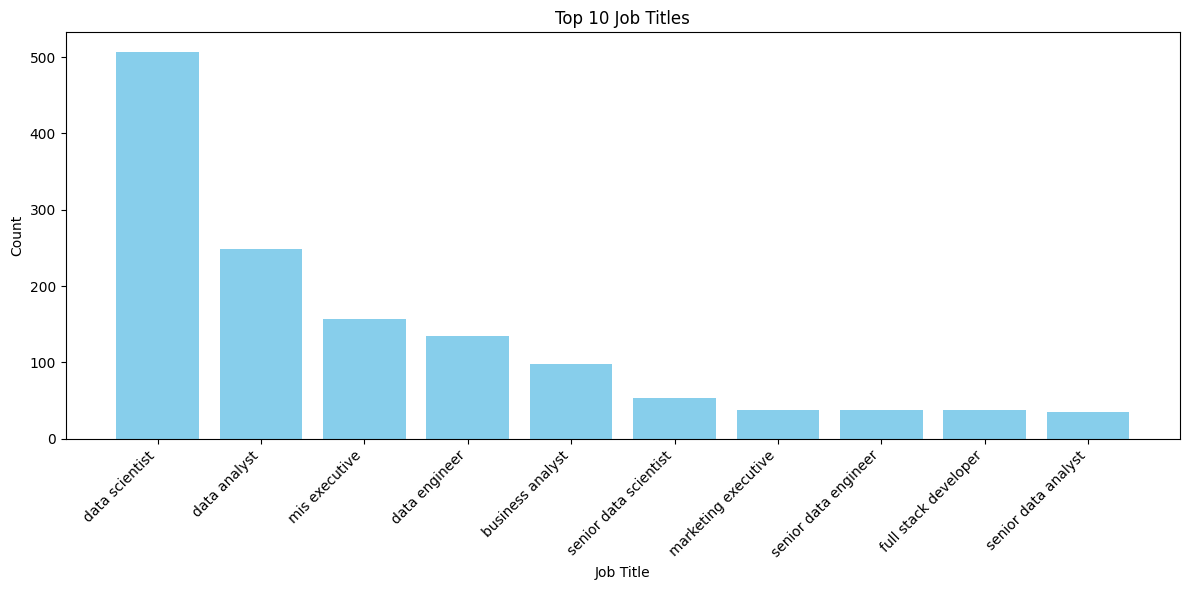

In [50]:
def bar_plot(x, y, x_label, title):
    plt.figure(figsize=(12, 6)) 
    plt.bar(x, y, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
bar_plot(top_10_job_titles.index, top_10_job_titles.values, 'Job Title', 'Top 10 Job Titles')

#### 1.2. Job Experience Analysis

In [51]:
# Function to preprocess 'Job Experience' values and calculate the average

def preprocess_experience(experience):
    try:
        # Check if the value is "no fixed duration"
        if experience == "no fixed duration":
            return None  # Assign a special value, such as None or NaN, to represent the lack of fixed duration
        
        # Remove 'years' and split the range
        exp_range = experience.replace(' years', '').split(' - ')
        
        # Calculate the average of the range
        avg_experience = (float(exp_range[0]) + float(exp_range[1])) / 2
        
        return avg_experience
    except (ValueError, IndexError):
        return None  # Handle unexpected values or errors

# Apply the function to create a new column 'Experience (years)'
df['Average Experience (years)'] = df['Job Experience'].apply(preprocess_experience)

df.head()


Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 39   
1  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
2  not disclosed              posted: 29 days ago\napplicants: 1161   
3  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
4  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 96   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                      Industry Type:  \
0  role: data scientist\nindustry type: recruitme...   
1  role: full stack developer\nindustry type: it ...   
2  role: data analyst\nindustry type: management ...   
3  role: other\nindustry type: management consult...   
4  role: marketing manager\nindustry type: intern...   

                                 Required Education:  \
0  education\nug: any graduate\npg: any postgraduate   
1  education\nug: any graduate\npg: any postgraduate   
2  education\nug: any graduate\npg: mba/pgdm in f...   
3  education\nug: any graduate\npg: any postgraduate   
4  education\nug: b.b.a/ b.m.s in management\npg:...   

                                         Key Skills:  \
0  unixlinuxstaffingtime managementproject manage...   
1  jquerysilverlightmysqlssrsjavascriptphpwcfwpfs...   
2  skills highlighted with ‘‘ are preferred keysk...   
3  data analysisleadership developmentcsrexcelnut...   
4  data analysisweb analyticssocial mediastrategi...   

                                key_skills_seperated        Date  \
0  ['unix', 'linux', 'staffing', 'time management...  2023-10-27   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...  2023-10-27   
2  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
3  ['data analysis', 'leadership development', 'c...  2023-10-27   
4  ['data analysis', 'web analytics', 'social med...  2023-10-27   

                        key_skills_seperated_cleaned applicants_count  \
0  ['unix', 'linux', 'staffing', 'time management...               39   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...              118   
2  ['fxdata engineeringdocumentationsystems engin...             1161   
3  ['leadership development', 'csrexcel', 'nutrit...              165   
4  ['web analytics', 'social media', 'strategic p...               96   

   Average Experience (years)  
0                        12.5  
1                         3.0  
2                         5.0  
3                         1.5  
4                         2.5

In [52]:
df['Skills/Description'] = df['key_skills_seperated_cleaned'].apply(lambda x: ', '.join(x))

In [53]:
# Counting the top 10 average job experiences
top_10_avg_experiences = df['Average Experience (years)'].value_counts().nlargest(10)

# Printing the count of the top 10 average job experiences
print("Top 10 Average Job Experiences:")
print(top_10_avg_experiences)

Top 10 Average Job Experiences:
Average Experience (years)
3.5    743
4.0    698
4.5    663
5.5    551
3.0    495
7.5    490
6.5    476
2.5    470
2.0    441
5.0    400
Name: count, dtype: int64


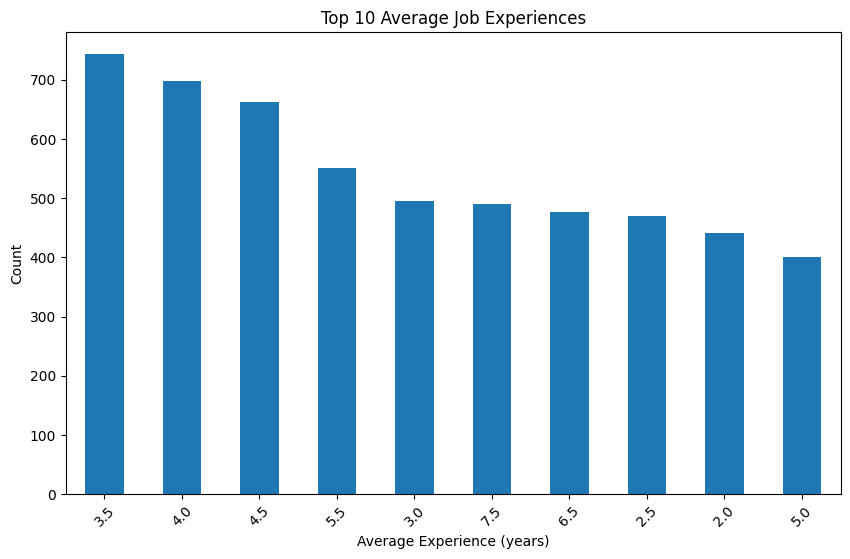

In [54]:
# Plotting the top 10 average job experiences in a bar chart
plt.figure(figsize=(10, 6))
top_10_avg_experiences.plot(kind='bar')
plt.xlabel('Average Experience (years)')
plt.ylabel('Count')
plt.title('Top 10 Average Job Experiences')
plt.xticks(rotation=45)
plt.show()

#### 1.3. Job Location Analysis

In [55]:
def preprocess_location(loc):
    loc=re.split('\(', loc)[0].strip()
    loc=re.sub('New Delhi','Delhi',loc)
    return loc

In [56]:
## 1.3.1 - finding the top 10 job locations

# splitting values and saving into a list
loc=df['Job Location:'].tolist()
loc=[j.strip() for i in [j.strip() for i in loc for j in i.split(',')] for j in i.split('/')]

# count
fdist = FreqDist(loc)
loc_df=pd.DataFrame(list(dict(fdist).items()), columns=['location', 'job openings'])

# removing alternate names
for loc in ['bengaluru','secunderabad','cochin','ncr','gurugram']:
    loc_df=loc_df[loc_df['location']!=loc]
    
# applying function
loc_df['location']=loc_df['location'].apply(preprocess_location)
loc_df=loc_df.groupby('location').sum().reset_index(level=0)
# top 10 locations
loc_df=loc_df.sort_values(by='job openings',ascending=False)[:10]
loc_df['area(sq)'] = [709, 650, 603, 331, 426, 732, 1484, 185, 203, 300]
loc_df['population(million)'] = [12.3, 10.5, 20.7, 3.1, 7.1, 1.5, 18.9, 14.9, 0.7, 12]
loc_df.style.background_gradient(cmap='mako_r')


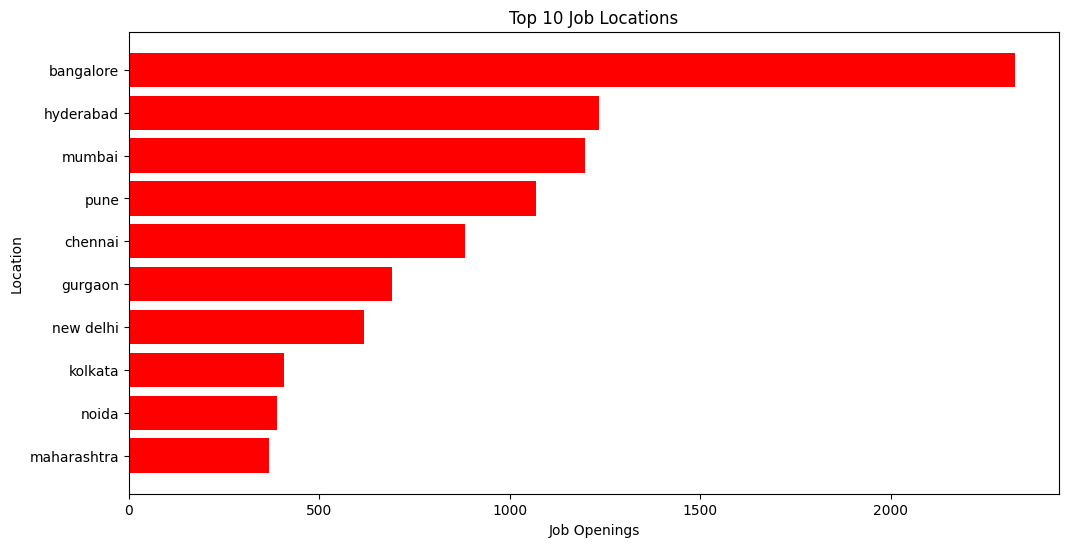

In [57]:
plt.figure(figsize=(12, 6))
plt.barh(loc_df['location'], loc_df['job openings'], color='red')
plt.xlabel('Job Openings')
plt.ylabel('Location')
plt.title('Top 10 Job Locations')
plt.gca().invert_yaxis()  
plt.show()

In [58]:
loc_df['location'][:5]

53     bangalore
198    hyderabad
329       mumbai
394         pune
113      chennai
Name: location, dtype: object

In [59]:
# Function to segregate locations

def segregate_locations(location):
    locations = location.split(', ')
    if len(locations) == 1:
        return locations[0], None  # Single Location
    else:
        return None, ', '.join(locations)  # Mixed Locations


df['Single Location'], df['Mixed Locations'] = zip(*df['Job Location:'].apply(segregate_locations))

City: bangalore/bengaluru
Data Scientist Jobs: 214
Data Analyst Jobs: 110

City: hyderabad/secunderabad
Data Scientist Jobs: 74
Data Analyst Jobs: 61

City: mumbai
Data Scientist Jobs: 47
Data Analyst Jobs: 46

City: pune
Data Scientist Jobs: 54
Data Analyst Jobs: 40

City: chennai
Data Scientist Jobs: 49
Data Analyst Jobs: 29



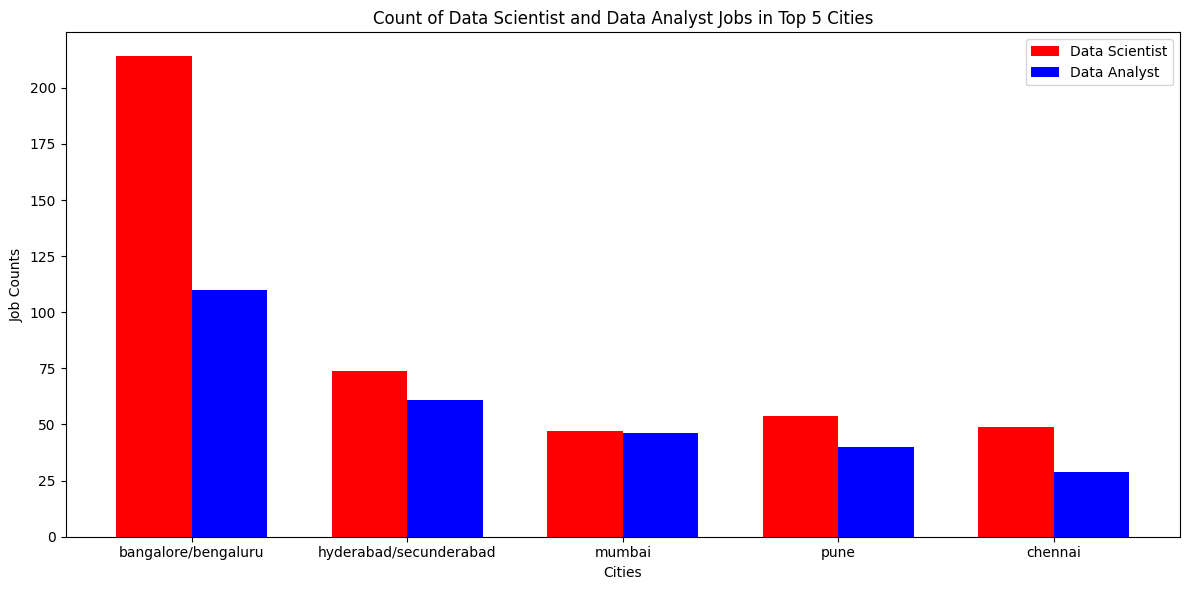

In [60]:
# 1.3.2  - analyzing the Data scientist / Data analyst jobs in top 5 cities 

# top 5 cities
top_5_cities = ['bangalore/bengaluru', 'hyderabad/secunderabad', 'mumbai', 'pune', 'chennai']

city_job_counts = {}

for city in top_5_cities:
    city_data = df[df['Single Location'] == city]
    data_scientist_count = city_data['Job Title:'].str.lower().str.contains('data scientist').sum()
    data_analyst_count = city_data['Job Title:'].str.lower().str.contains('data analyst').sum()
    
    city_job_counts[city] = {'Data Scientist': data_scientist_count, 'Data Analyst': data_analyst_count}

for city, counts in city_job_counts.items():
    print(f"City: {city}")
    print("Data Scientist Jobs:", counts['Data Scientist'])
    print("Data Analyst Jobs:", counts['Data Analyst'])
    print()


cities = top_5_cities
data_scientist_counts = [city_job_counts[city]['Data Scientist'] for city in top_5_cities]
data_analyst_counts = [city_job_counts[city]['Data Analyst'] for city in top_5_cities]
bar_width = 0.35
index = np.arange(len(cities))


plt.figure(figsize=(12, 6))
plt.bar(index, data_scientist_counts, bar_width, label='Data Scientist', align='center',color ='red')
plt.bar(index + bar_width, data_analyst_counts, bar_width, label='Data Analyst', align='center',color='blue')
plt.xlabel('Cities')
plt.ylabel('Job Counts')
plt.title('Count of Data Scientist and Data Analyst Jobs in Top 5 Cities')
plt.xticks(index + bar_width / 2, cities)
plt.legend()


plt.tight_layout()
plt.show()

Single loctions : 6860
Multiple locations : 1256


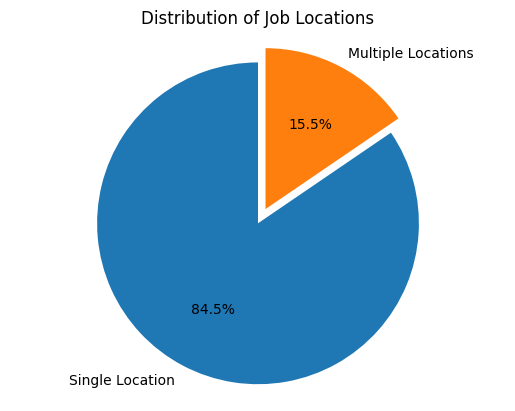

In [61]:
# 1.3.3 - Analyzing the distribution of job locations, both single and mixed, to identify popular work areas.

# Single location job postings
single_location_count = df['Single Location'].count()

# Mixed location job postings
mixed_location_count = df['Mixed Locations'].count()

print('Single loctions :',single_location_count)
print('Multiple locations :',mixed_location_count)

# Plotting the distribution of single and mixed locations
explode = (0, 0.1)
labels = ['Single Location', 'Multiple Locations']
sizes = [single_location_count, mixed_location_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,explode=explode)
plt.axis('equal')
plt.title('Distribution of Job Locations')
plt.show()

In [62]:
import folium
# latitude and longitude of the locations
#lat=[12.9716,18.5204,17.3850,19.0760,13.0827,28.4595,28.6139,28.5355,22.5726,23.0225]
#lon=[77.5946,73.8567,78.4867,72.8777,80.2707,77.0266,77.2090,77.3910,88.3639,72.5714]
lat = [12.9716, 17.3850, 19.0760, 18.5204, 13.0827, 28.4595, 28.6139, 22.5726, 28.5355,19.7515]
lon = [77.5946, 78.4867, 72.8777, 73.8567, 80.2707, 77.0266, 77.2090, 88.3639, 77.3910,75.7139]



df1=loc_df.copy()
df1['lat']=lat
df1['lon']=lon

# title
loc = 'Top 10 Job Locations'
title_html = '''
             <h3 align="center" style="font-size:20px"><b>{}</b></h3>
             '''.format(loc)

# creating map
m = folium.Map(location=[20,78], tiles="OpenStreetMap", zoom_start=4.5)
m.get_root().html.add_child(folium.Element(title_html))
    
for i in range(0,len(df1)):
    # marking each location
    folium.Marker(
        location=[df1.iloc[i]['lat'], df1.iloc[i]['lon']],
        popup=f"{df1.iloc[i]['location']} - Counts: {df1.iloc[i]['job openings']}",
        icon=folium.Icon(icon='info-sign', color="red"),
        draggable=False
   ).add_to(m)

# Show the map
m

#### 1.4. Job Skill Analysis

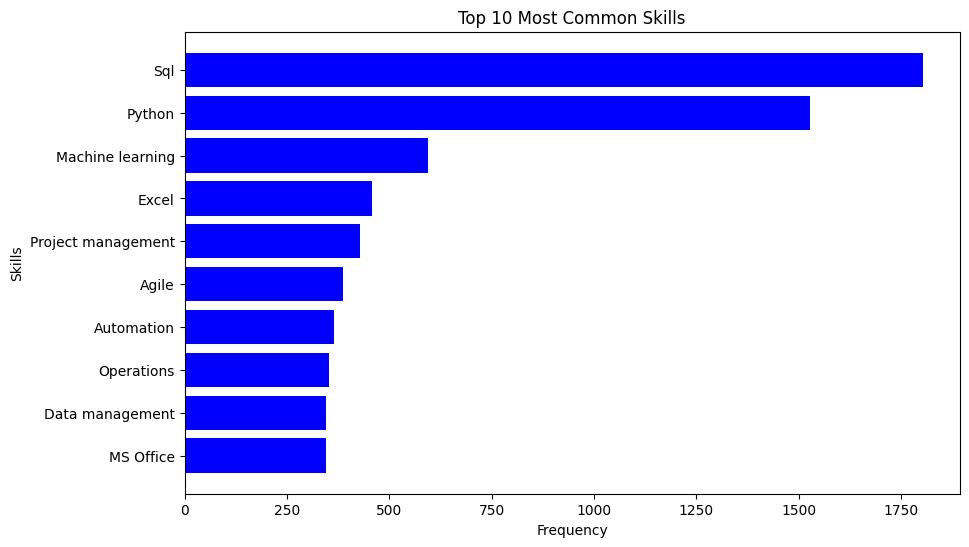

In [63]:
# Extract the skill names and their counts
skill_names, skill_counts = zip(*top_10_skills)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(skill_names, skill_counts, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 10 Most Common Skills')
plt.gca().invert_yaxis()  
plt.show()

#### 1.5. Finding 10 top Job Roles, Industry Type, Department in Data Science Jobs

In [64]:
dfs = {}
def columns_top_10_value_gradient_table(column_name, axis_name, top, cmap):
    df_name = f'{column_name}_{top}_job_10'  
    if top == "most":
        dfs[df_name] = pd.DataFrame(df[column_name].value_counts()[:10].rename_axis(axis_name).reset_index(name='Count'))
    elif top == "least":
        dfs[df_name] = pd.DataFrame(df[column_name].value_counts()[-10:].rename_axis(axis_name).reset_index(name='Count'))
    dfs[df_name]['percentage'] = dfs[df_name]['Count']/ sum(dfs[df_name]['Count'])
    
    return dfs[df_name].style.background_gradient(cmap=cmap)

#### Expand Industry Type and Education to separate columns (This is part of preprocessing but It must be done after first analysis since it would change the structure of df)

In [65]:
# Function to parse the "DataString" column into a dictionary

def parse_to_dict(data_string):
    data_dict = {}
    lines = data_string.split('\n')
    for line in lines:
        if ":" in line:
            key, value = line.split(': ', 1)
            data_dict[key] = value
    return data_dict

# Apply the parsing function to the "Industry Type" and "Required Education" column and create a new column "DataDict"
df['IndustryTypeDict'] = df['Industry Type:'].apply(parse_to_dict)

# Remove "Education\n" from Required Education string
df['Required Education:'] = df['Required Education:'].str.replace('Education\n', '')
df['EducationDict'] = df['Required Education:'].apply(parse_to_dict)


In [66]:
# List of column names to drop
columns_to_drop = ['Job Salary', 'Key Skills:', 'Date', 'Job Stats', 'Industry Type:', 'Required Education:']

# Drop the specified columns by name
df = df.drop(columns_to_drop, axis=1)

In [67]:
# Expand "IndustryTypeDict" and "EducationDict" Dictionary Columns as seperate columns in Our df
def expand_dict_column(input_df, column_name):
    df = pd.concat([input_df.drop([column_name], axis=1), input_df[column_name].apply(pd.Series)], axis=1)
    return df

In [68]:
# Apply the function to the "EducationDict" and "IndustryTypeDict" columns
df = expand_dict_column(df, "EducationDict")
df = expand_dict_column(df, "IndustryTypeDict")
df.head()


Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                key_skills_seperated  \
0  ['unix', 'linux', 'staffing', 'time management...   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2  ['skills highlighted with ‘‘ are preferred key...   
3  ['data analysis', 'leadership development', 'c...   
4  ['data analysis', 'web analytics', 'social med...   

                        key_skills_seperated_cleaned applicants_count  \
0  ['unix', 'linux', 'staffing', 'time management...               39   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...              118   
2  ['fxdata engineeringdocumentationsystems engin...             1161   
3  ['leadership development', 'csrexcel', 'nutrit...              165   
4  ['web analytics', 'social media', 'strategic p...               96   

   Average Experience (years)  \
0                        12.5   
1                         3.0   
2                         5.0   
3                         1.5   
4                         2.5   

                                  Skills/Description      Single Location  \
0  [, ', u, n, i, x, ', ,,  , ', l, i, n, u, x, '...  bangalore/bengaluru   
1  [, ', q, u, e, r, y, ', ,,  , ', s, i, l, v, e...  bangalore/bengaluru   
2  [, ', f, x, d, a, t, a,  , e, n, g, i, n, e, e...                 None   
3  [, ', l, e, a, d, e, r, s, h, i, p,  , d, e, v...                 pune   
4  [, ', w, e, b,  , a, n, a, l, y, t, i, c, s, '...  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [69]:
df.columns

Index(['Job Title:', 'Company Name:', 'Job Location:', 'Job Experience',
       'Job Description:', 'key_skills_seperated',
       'key_skills_seperated_cleaned', 'applicants_count',
       'Average Experience (years)', 'Skills/Description', 'Single Location',
       'Mixed Locations', 'ug', 'pg', 'doctorate', 'role', 'industry type',
       'department', 'employment type', 'role category'],
      dtype='object')

In [70]:
df.head()

Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                key_skills_seperated  \
0  ['unix', 'linux', 'staffing', 'time management...   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2  ['skills highlighted with ‘‘ are preferred key...   
3  ['data analysis', 'leadership development', 'c...   
4  ['data analysis', 'web analytics', 'social med...   

                        key_skills_seperated_cleaned applicants_count  \
0  ['unix', 'linux', 'staffing', 'time management...               39   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...              118   
2  ['fxdata engineeringdocumentationsystems engin...             1161   
3  ['leadership development', 'csrexcel', 'nutrit...              165   
4  ['web analytics', 'social media', 'strategic p...               96   

   Average Experience (years)  \
0                        12.5   
1                         3.0   
2                         5.0   
3                         1.5   
4                         2.5   

                                  Skills/Description      Single Location  \
0  [, ', u, n, i, x, ', ,,  , ', l, i, n, u, x, '...  bangalore/bengaluru   
1  [, ', q, u, e, r, y, ', ,,  , ', s, i, l, v, e...  bangalore/bengaluru   
2  [, ', f, x, d, a, t, a,  , e, n, g, i, n, e, e...                 None   
3  [, ', l, e, a, d, e, r, s, h, i, p,  , d, e, v...                 pune   
4  [, ', w, e, b,  , a, n, a, l, y, t, i, c, s, '...  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [71]:
columns_top_10_value_gradient_table('role', 'Job Role','most', 'Greys')

In [72]:
columns_top_10_value_gradient_table('industry type', 'Industry Type', 'most', 'Greys')

In [73]:
columns_top_10_value_gradient_table('industry type', 'Industry Type', 'least', 'Blues')

In [74]:
columns_top_10_value_gradient_table('department', 'Department', 'most', 'Greys')


In [75]:
columns_top_10_value_gradient_table('department', 'Department', 'least', 'Blues')

In [76]:
dfs

{'role_most_job_10':                                   Job Role  Count  percentage
 0                             data analyst    807    0.226877
 1                           data scientist    487    0.136913
 2             software development - other    387    0.108800
 3                         business analyst    363    0.102052
 4                            data engineer    358    0.100647
 5                                    other    351    0.098679
 6                            mis executive    268    0.075344
 7                       back end developer    233    0.065505
 8         data science & analytics - other    161    0.045263
 9  data science & machine learning - other    142    0.039921,
 'industry type_most_job_10':                     Industry Type  Count  percentage
 0        it services & consulting   2559    0.503344
 1          recruitment / staffing    573    0.112707
 2           management consulting    331    0.065106
 3                         banking    318

#### 1.6. Analysis of top 10 job roles and their required skills

In [77]:
def plot_top_roles_vs_skills(top_bottom):
# Create an empty DataFrame to store the results
    dataframe = pd.DataFrame()
    
    # Assuming you have a DataFrame 'df' and a DataFrame 'job_10' with job roles
    for job in dfs['role_most_job_10']['Job Role']:
        
        # Filter the DataFrame by job role
        df1 = df[df['role'] == job]
        # percentage = dfs['Role_job_10'][dfs['Role_job_10']['Job Role'] == job]
        
        # Extract and preprocess the skills from the 'Skills/Description' column
        skill = [re.sub(r'\[|\]', '', skill) for skills in df1['key_skills_seperated'] for skill in skills.split(', ') ]
        
        # Calculate the frequency distribution of skills
        fdist = FreqDist(skill)
        
        # Create a DataFrame from the frequency distribution
        fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
        
        # Sort the DataFrame by skill count in descending order and select the top 10 skills
        if top_bottom == "top_skills":
            fdist_df = fdist_df.sort_values(by='count', ascending=False)[:10]
        elif top_bottom == "bottom_skills":
            fdist_df = fdist_df.sort_values(by='count', ascending=False)[-10:]

        # Assign the job role to the DataFrame
        fdist_df = fdist_df.assign(job=job)
        fdist_df['percentage'] = fdist_df['count']/sum(fdist_df['count'])
        
        # Append the results to the main DataFrame
        dataframe = pd.concat([dataframe, fdist_df], ignore_index=True)
        # dataframe = dataframe.concat(fdist_df)
    
    # Create a sunburst chart
    fig = px.sunburst(dataframe,
                      path=['job', 'skill'],
                      values='count'
                     )
    
    fig.update_layout(
        autosize=False,
        title_text=f'Top Jobs and the {top_bottom}',
        title_x=0.5,
        width=1000,
        height=1000
    )
    
    # Display the figure
    fig.show()
plot_top_roles_vs_skills("top_skills")
plot_top_roles_vs_skills("bottom_skills")

### data analysis 2 : underlying structure and deviations from the trend

In [78]:
df.head()

Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                key_skills_seperated  \
0  ['unix', 'linux', 'staffing', 'time management...   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2  ['skills highlighted with ‘‘ are preferred key...   
3  ['data analysis', 'leadership development', 'c...   
4  ['data analysis', 'web analytics', 'social med...   

                        key_skills_seperated_cleaned applicants_count  \
0  ['unix', 'linux', 'staffing', 'time management...               39   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...              118   
2  ['fxdata engineeringdocumentationsystems engin...             1161   
3  ['leadership development', 'csrexcel', 'nutrit...              165   
4  ['web analytics', 'social media', 'strategic p...               96   

   Average Experience (years)  \
0                        12.5   
1                         3.0   
2                         5.0   
3                         1.5   
4                         2.5   

                                  Skills/Description      Single Location  \
0  [, ', u, n, i, x, ', ,,  , ', l, i, n, u, x, '...  bangalore/bengaluru   
1  [, ', q, u, e, r, y, ', ,,  , ', s, i, l, v, e...  bangalore/bengaluru   
2  [, ', f, x, d, a, t, a,  , e, n, g, i, n, e, e...                 None   
3  [, ', l, e, a, d, e, r, s, h, i, p,  , d, e, v...                 pune   
4  [, ', w, e, b,  , a, n, a, l, y, t, i, c, s, '...  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [79]:
title_experience_stats = df[['Job Title:', 'Average Experience (years)']]

In [80]:
# Analysis 1 : Analyze and display the top 10 job titles with the highest average experience, 
# which indicate deviations or unusual requirements in job postings compared to the common trend

title_experience_stats = title_experience_stats.sort_values(by='Average Experience (years)', ascending=False)
title_experience_stats = title_experience_stats.drop_duplicates(subset='Job Title:')
# Extracting the top 10 job titles and average experience
top_10_data = title_experience_stats[['Job Title:', 'Average Experience (years)']].head(10)

print(f"{'Job Title':<70}{'Avg years'}")
print('-' * 80)  
for row in top_10_data.iterrows():
    _, data = row
    job_title, avg_experience = data
    print(f"{job_title:<70}{avg_experience}")


Job Title                                                             Avg years
--------------------------------------------------------------------------------
technical and analytics head                                          25.0
amazing opening for quality head for leading manufacturing industry   23.0
urgently looking for vp- risk & control operations                    23.0
head - sap s/4 hana & it                                              22.5
chief financial officer                                               22.5
general manager operations                                            21.0
director, construction systems                                        20.5
manager- voice of customer                                            20.0
lead business functional analyst - vice president                     20.0
hydrologist                                                           20.0


#### Generally, the common average experience requirement for jobs in the data science field falls within the range of 3 to 4.5 years. However we identified some job titles that deviate significantly from this common trend, demanding exceptionally high levels of experience. These job titles have an average experience requirement that exceeds 20 years, indicating unusual and specialized criteria.

In [81]:
df['company_name'] = df['Company Name:'].apply(lambda x: re.sub(r'\d.*$', '', x))

df['applicants_count'] = pd.to_numeric(df['applicants_count'], errors='coerce').fillna(0).astype(int)

In [82]:
grouped_data = df.groupby(['Job Location:', 'industry type'])['applicants_count'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='applicants_count', ascending=False)


In [83]:
grouped_data = df.groupby(['Job Location:', 'industry type'])['applicants_count'].sum().reset_index()
grouped_data

Job Location:  \
0                                            agra   
1                              agra,uttar pradesh   
2                              agra,uttar pradesh   
3                                       ahmedabad   
4                                       ahmedabad   
...                                           ...   
2198  warangal, hyderabad/secunderabad, nizamabad   
2199  warangal, hyderabad/secunderabad, nizamabad   
2200  warangal, hyderabad/secunderabad, nizamabad   
2201                                      wayanad   
2202                                 west tripura   

                              industry type  applicants_count  
0                  it services & consulting               278  
1                 electronics manufacturing               122  
2     financial services (asset management)                35  
3                     accounting / auditing                 0  
4                   advertising & marketing              1385  
...                                     ...               ...  
2198              electronics manufacturing              1049  
2199                     fitness & wellness               114  
2200               it services & consulting               243  
2201            medical devices & equipment                 0  
2202                 recruitment / staffing                21  

[2203 rows x 3 columns]

In [84]:
df

Job Title:  \
0                            senior. data scientist   
1                                 software engineer   
2                         data analyst - wealthtech   
3     project associate - public health and csenior   
4                        senior marketing executive   
...                                             ...   
8969                            procurement manager   
8970      data visualization analyst - trai , delhi   
8972                                  mis executive   
8974                                        manager   
8975    senior. process associate - purchase to pay   

                                          Company Name:        Job Location:  \
0                                              skillety  bangalore/bengaluru   
1                         talent software4.1120 reviews  bangalore/bengaluru   
2                                  mithra hr consulting         mumbai, pune   
3                    renalysis consultants2.310 reviews                 pune   
4                                               mechuni  bangalore/bengaluru   
...                                                 ...                  ...   
8969                     ks smart solutions4.73 reviews              chennai   
8970  national institute for smart government (nisg)...          delhi / ncr   
8972                              right step consulting              gurgaon   
8974                       grant thornton3.7608 reviews     gurgaon/gurugram   
8975                             siemens4.23944 reviews  bangalore/bengaluru   

     Job Experience                                   Job Description:  \
0     10 - 15 years  strong r/python programming skills and work ex...   
1       2 - 4 years  translate application storyboards and use case...   
2       3 - 7 years  data analyst - wealthtech\n\nrole : data analy...   
3       1 - 2 years  support the development and implementation of ...   
4       1 - 4 years  we are looking for a senior marketing executiv...   
...             ...                                                ...   
8969    5 - 8 years  job description:\ndevise and use productive so...   
8970   6 - 11 years  data visualization analyst (data scientist)\n\...   
8972    0 - 2 years  brief role : job description\n\nmaintaining mi...   
8974   7 - 11 years  roles and responsibilities:\npart of valuation...   
8975    2 - 3 years  understand business requirements in bi context...   

                                   key_skills_seperated  \
0     ['unix', 'linux', 'staffing', 'time management...   
1     ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2     ['skills highlighted with ‘‘ are preferred key...   
3     ['data analysis', 'leadership development', 'c...   
4     ['data analysis', 'web analytics', 'social med...   
...                                                 ...   
8969  ['skills highlighted with ‘‘ are preferred key...   
8970  ['skills highlighted with ‘‘ are preferred key...   
8972  ['bpoaccountancy', 'tally', 'analytical', 'bac...   
8974  ['valuation analysis', 'data analysis', 'inter...   
8975  ['process associate', 'automationdata scienced...   

                           key_skills_seperated_cleaned  applicants_count  \
0     ['unix', 'linux', 'staffing', 'time management...                39   
1     ['query', 'silverlight', 'sql', 'ssrsjavascrip...               118   
2     ['fxdata engineeringdocumentationsystems engin...              1161   
3     ['leadership development', 'csrexcel', 'nutrit...               165   
4     ['web analytics', 'social media', 'strategic p...                96   
...                                                 ...               ...   
8969  ['it procurement', 'procurement managementdata...               555   
8970  ['data science', 'big data', 'data engineering...               238   
8972  ['bpoaccountancy', 'tally', 'back office', 'fm...               829   
8974  ['valuation analysis', 'interpersonal skills'

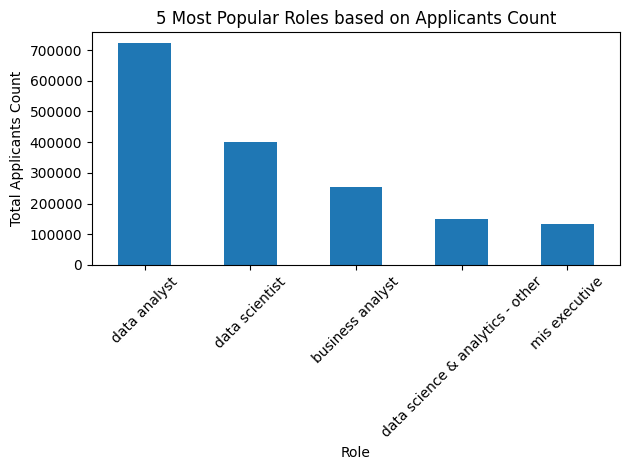

In [85]:
# Group the data by industry and sum the applicants count
top_industries = df.groupby('role')['applicants_count'].sum().nlargest(5)

# Plotting the top 5 industries
top_industries.plot(kind='bar')
plt.xlabel('Role')
plt.ylabel('Total Applicants Count')
plt.title('5 Most Popular Roles based on Applicants Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


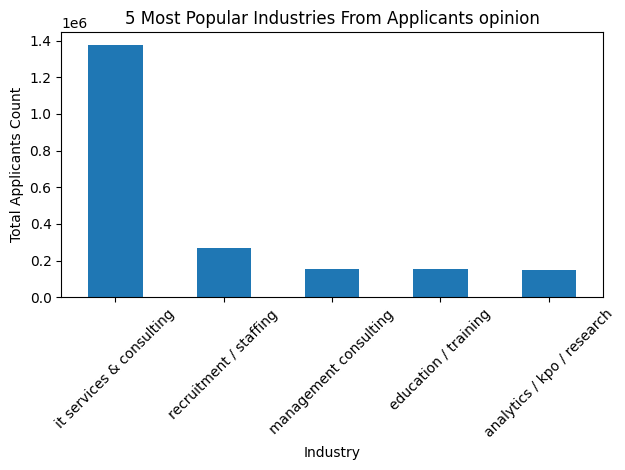

In [86]:
top_industries = df.groupby('industry type')['applicants_count'].sum().nlargest(5)

# Plotting the top 5 industries
top_industries.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Applicants Count')
plt.title('5 Most Popular Industries From Applicants opinion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

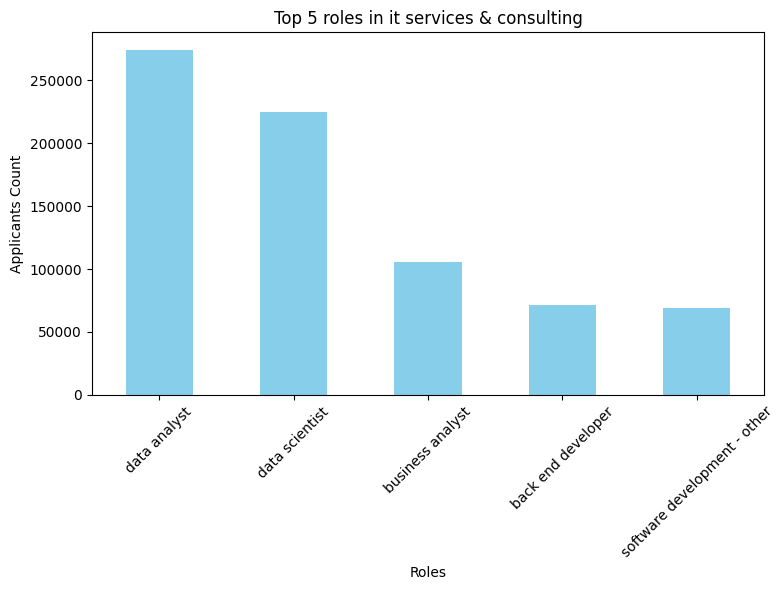

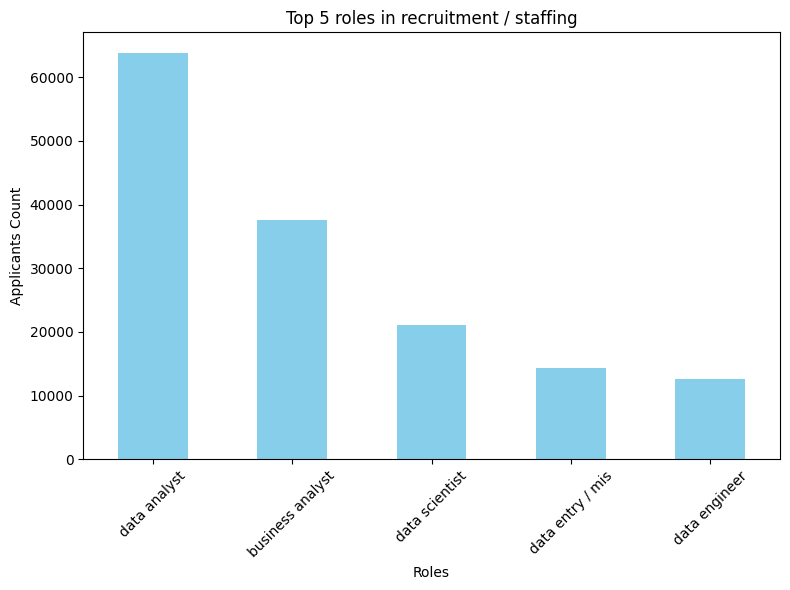

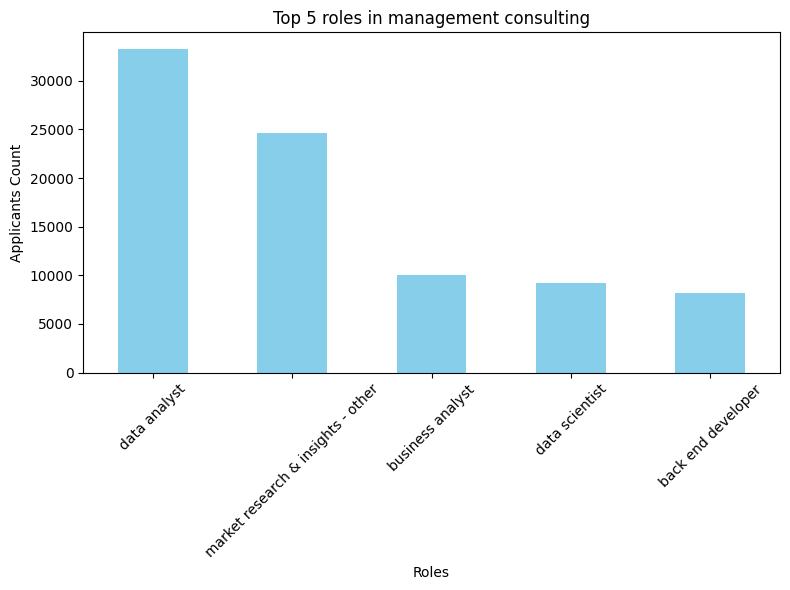

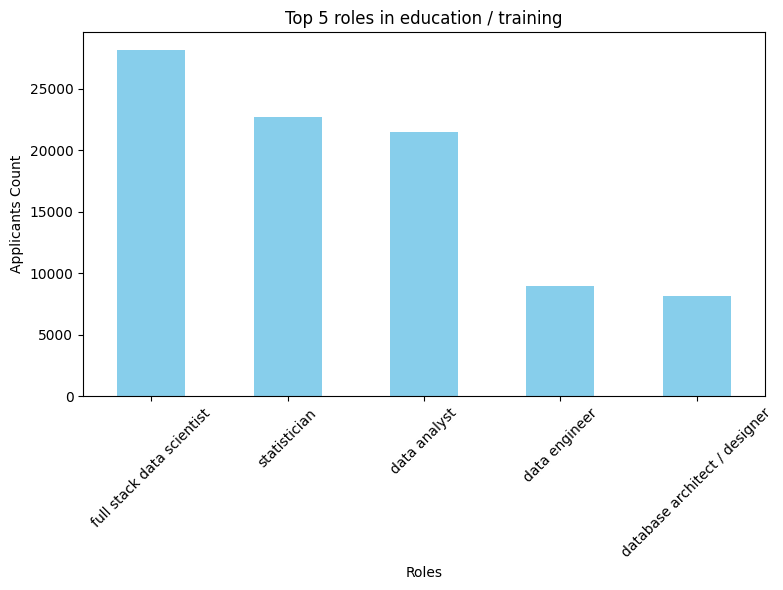

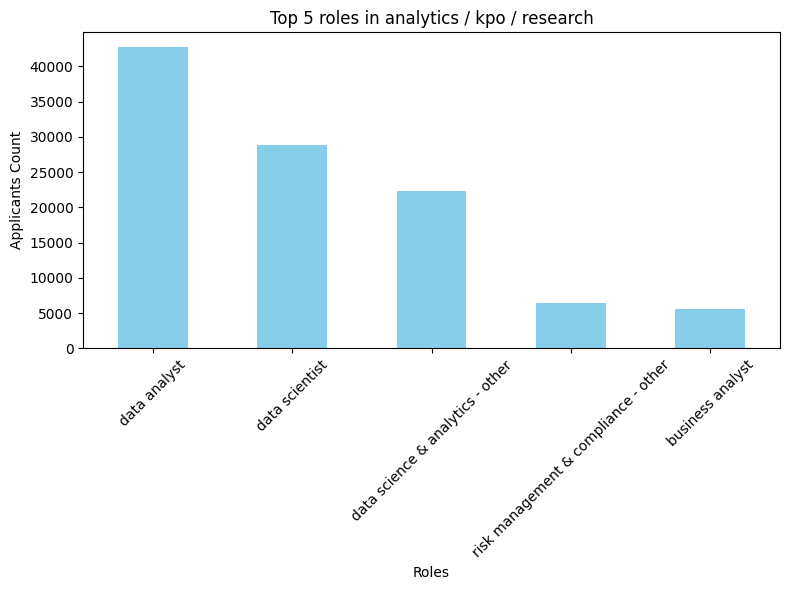

In [87]:
top_industries = df.groupby('industry type')['applicants_count'].sum().nlargest(5).index.tolist()

# Create an empty dictionary to store top roles for each industry
top_roles = {}

# Iterate over the top industries
for industry in top_industries:
    # Filter the data for the current industry
    filtered_data = df[df['industry type'] == industry]
    
    # Find the top 5 roles for the current industry
    top_roles[industry] = filtered_data.groupby('role')['applicants_count'].sum().nlargest(5)

# Display the top 5 roles for each of the top 5 industries
for industry, roles in top_roles.items():
    plt.figure(figsize=(8, 6))
    roles.plot(kind='bar', color='skyblue')
    plt.title(f"Top 5 roles in {industry}")
    plt.xlabel("Roles")
    plt.ylabel("Applicants Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [88]:
# Count the total number of applicants for each skill
skills_applicant_count = df.groupby('key_skills_seperated_cleaned')['applicants_count'].sum().sort_values(ascending=False)

# Display the skills with the highest total applicants
top_skills_applicants = skills_applicant_count.head(2)  # You can adjust the number to display more or fewer skills
print("Skills with more applicants:")
print(top_skills_applicants)


Skills with more applicants:
key_skills_seperated_cleaned
['sas programmer analystsas developerclinical sassas programmingsas programmer', 'clinical statisticsclinical sas analystsas programmer researchsas developer analystclinical analyticsclinical sas researchsas developer research']    40225
['natural language processing', 'phd', 'deep learning', 'data science']                                                                                                                                                                 34279
Name: applicants_count, dtype: int64


In [89]:
df['pg'].unique()
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you're interested in

top_values = df['pg'].value_counts().head(10)
print(top_values)

pg
any postgraduate                          5061
post graduation not required               461
mba/pgdm in any specialization             200
mba/pgdm in marketing                      133
mca in computers                            72
ca in ca                                    59
m.tech in any specialization                45
ms/m.sc(science) in any specialization      39
m.tech in computers                         37
ms/m.sc(science) in chemistry               29
Name: count, dtype: int64


In [90]:
dep_skill = pd.DataFrame()

for department in dfs['department_most_job_10']['Department'][:3]:
        
        # Filter the DataFrame by job role
        departments = df[df['department'] == department]
        # percentage = dfs['Role_job_10'][dfs['Role_job_10']['Job Role'] == job]
        
        # Extract and preprocess the skills from the 'Skills/Description' column
        skills = [re.sub(r'\[|\]', '', skill) for skills in departments['key_skills_seperated_cleaned'] for skill in skills.split(', ') ]
        
        # Calculate the frequency distribution of skills
        fdist = FreqDist(skills)
        
        # Create a DataFrame from the frequency distribution
        fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
        
        # # Sort the DataFrame by skill count in descending order and select the top 10 skills
        # if top_bottom == "top_skills":
        fdist_df = fdist_df.sort_values(by='count', ascending=False)[:4]
        # elif top_bottom == "bottom_skills":
        #     fdist_df = fdist_df.sort_values(by='count', ascending=False)[-5:]

        # Assign the job role to the DataFrame
        fdist_df = fdist_df.assign(department=department)
        fdist_df['percentage'] = fdist_df['count']/sum(fdist_df['count'])
        dep_skill = pd.concat([dep_skill, fdist_df], ignore_index=True)

In [91]:
industry_skill = pd.DataFrame()

for industry in dfs['industry type_most_job_10']['Industry Type'][:5]:
        
        # Filter the DataFrame by job role
        industries = df[df['industry type'] == industry]
        # percentage = dfs['Role_job_10'][dfs['Role_job_10']['Job Role'] == job]
        
        # Extract and preprocess the skills from the 'Skills/Description' column
        skills = [re.sub(r'\[|\]', '', skill) for skills in industries['key_skills_seperated_cleaned'] for skill in skills.split(', ') ]
        
        # Calculate the frequency distribution of skills
        fdist = FreqDist(skills)
        
        # Create a DataFrame from the frequency distribution
        fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
        
        # # Sort the DataFrame by skill count in descending order and select the top 10 skills
        # if top_bottom == "top_skills":
        fdist_df = fdist_df.sort_values(by='count', ascending=False)[:4]
        # elif top_bottom == "bottom_skills":
        #     fdist_df = fdist_df.sort_values(by='count', ascending=False)[-5:]

        # Assign the job role to the DataFrame
        fdist_df = fdist_df.assign(industry=industry)
        fdist_df['percentage'] = fdist_df['count']/sum(fdist_df['count'])
        industry_skill = pd.concat([industry_skill, fdist_df], ignore_index=True)

In [92]:
industry_location = pd.DataFrame()

for industry in dfs['industry type_most_job_10']['Industry Type'][:5]:
        
        # Filter the DataFrame by job role
        industries = df[df['industry type'] == industry]
        # percentage = dfs['Role_job_10'][dfs['Role_job_10']['Job Role'] == job]
        
        # Extract and preprocess the skills from the 'Skills/Description' column
        locations = [re.sub(r'\[|\]', '', location) for locations in industries['Job Location:'] for location in locations.split(', ') ]
        
        # Calculate the frequency distribution of skills
        fdist = FreqDist(locations)
        
        # Create a DataFrame from the frequency distribution
        fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['location', 'count'])
        
        # # Sort the DataFrame by skill count in descending order and select the top 10 skills
        # if top_bottom == "top_skills":
        fdist_df = fdist_df.sort_values(by='count', ascending=False)[:4]
        # elif top_bottom == "bottom_skills":
        #     fdist_df = fdist_df.sort_values(by='count', ascending=False)[-5:]

        # Assign the job role to the DataFrame
        fdist_df = fdist_df.assign(industry=industry)
        fdist_df['percentage'] = fdist_df['count']/sum(fdist_df['count'])
        industry_location = pd.concat([industry_location, fdist_df], ignore_index=True)

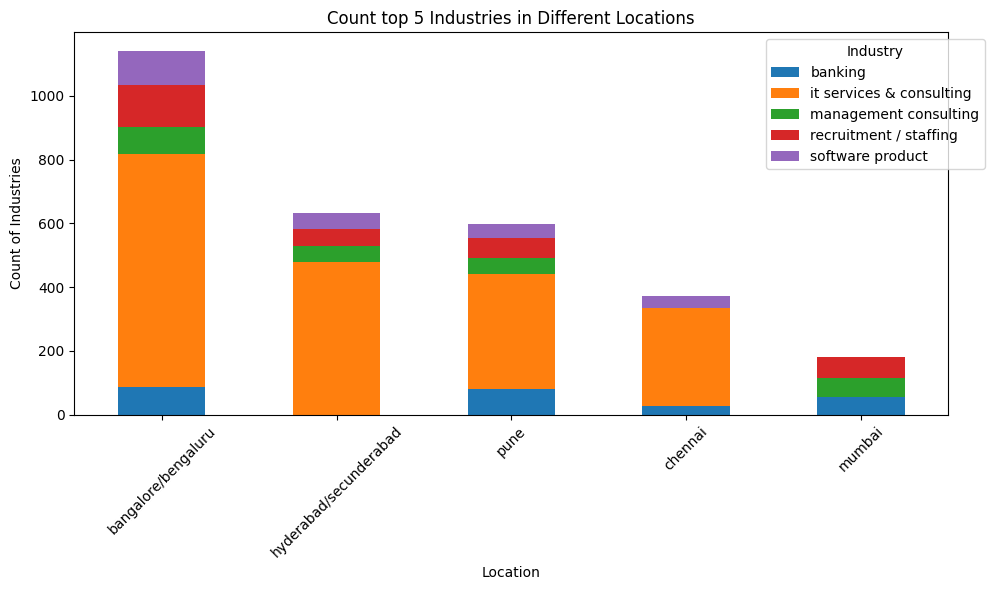

In [93]:
# Group the data by 'location' and 'industry', and sum the 'count' column
grouped = industry_location.groupby(['location', 'industry'])['count'].sum().unstack()

# Calculate the sum of counts for each location
location_counts = grouped.sum(axis=1)

# Sort the locations based on the total count of industries
sorted_locations = location_counts.sort_values(ascending=False).index

# Reorder the columns in the grouped DataFrame based on the sorted locations
grouped_sorted = grouped.loc[sorted_locations]

# Plotting the bar chart with locations sorted based on total counts
grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Count of Industries')
plt.title('Count top 5 Industries in Different Locations')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


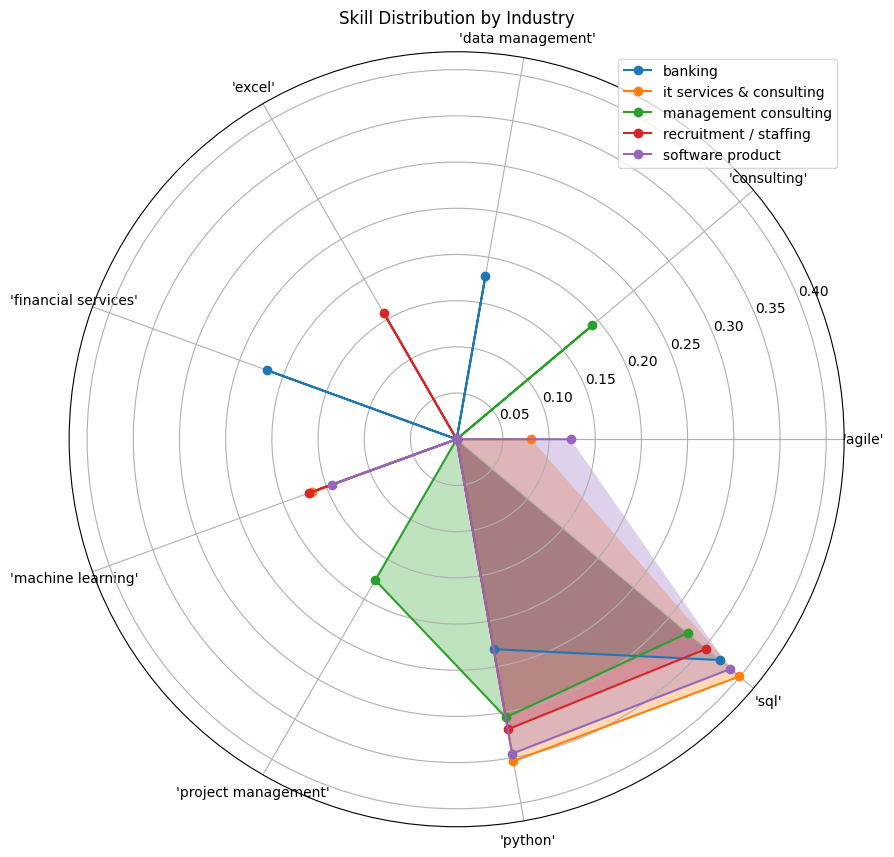

In [94]:
industries = industry_skill['industry'].unique()
skills = industry_skill['skill'].unique()

# Skill distribution percentages by industry
# Example data (replace with your actual skill distribution percentages)
# tech_skills = [40, 30, 30]  # Percentages of skills in Tech industry
# healthcare_skills = [20, 50, 30]  # Percentages of skills in Healthcare industry
# finance_skills = [50, 20, 30]  # Percentages of skills in Finance industry

# Data for the polar area chart
pivoted_data = industry_skill.pivot(index='industry', columns='skill', values='percentage').fillna(0)

# Data for the polar area chart
angles = np.linspace(0, 2 * np.pi, len(pivoted_data.columns), endpoint=False).tolist()

# Creating subplots for each industry
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(polar=True))

# Plotting each industry's skill distribution
for industry, values in pivoted_data.iterrows():
    ax.plot(angles, values.values, label=industry, marker='o')
    ax.fill(angles, values.values, alpha=0.3)

# Setting labels for each skill
ax.set_xticks(angles)
ax.set_xticklabels(pivoted_data.columns)

# Displaying the legend and title
plt.legend(loc='upper right')
plt.title('Skill Distribution by Industry')

# Show the plot
plt.show()

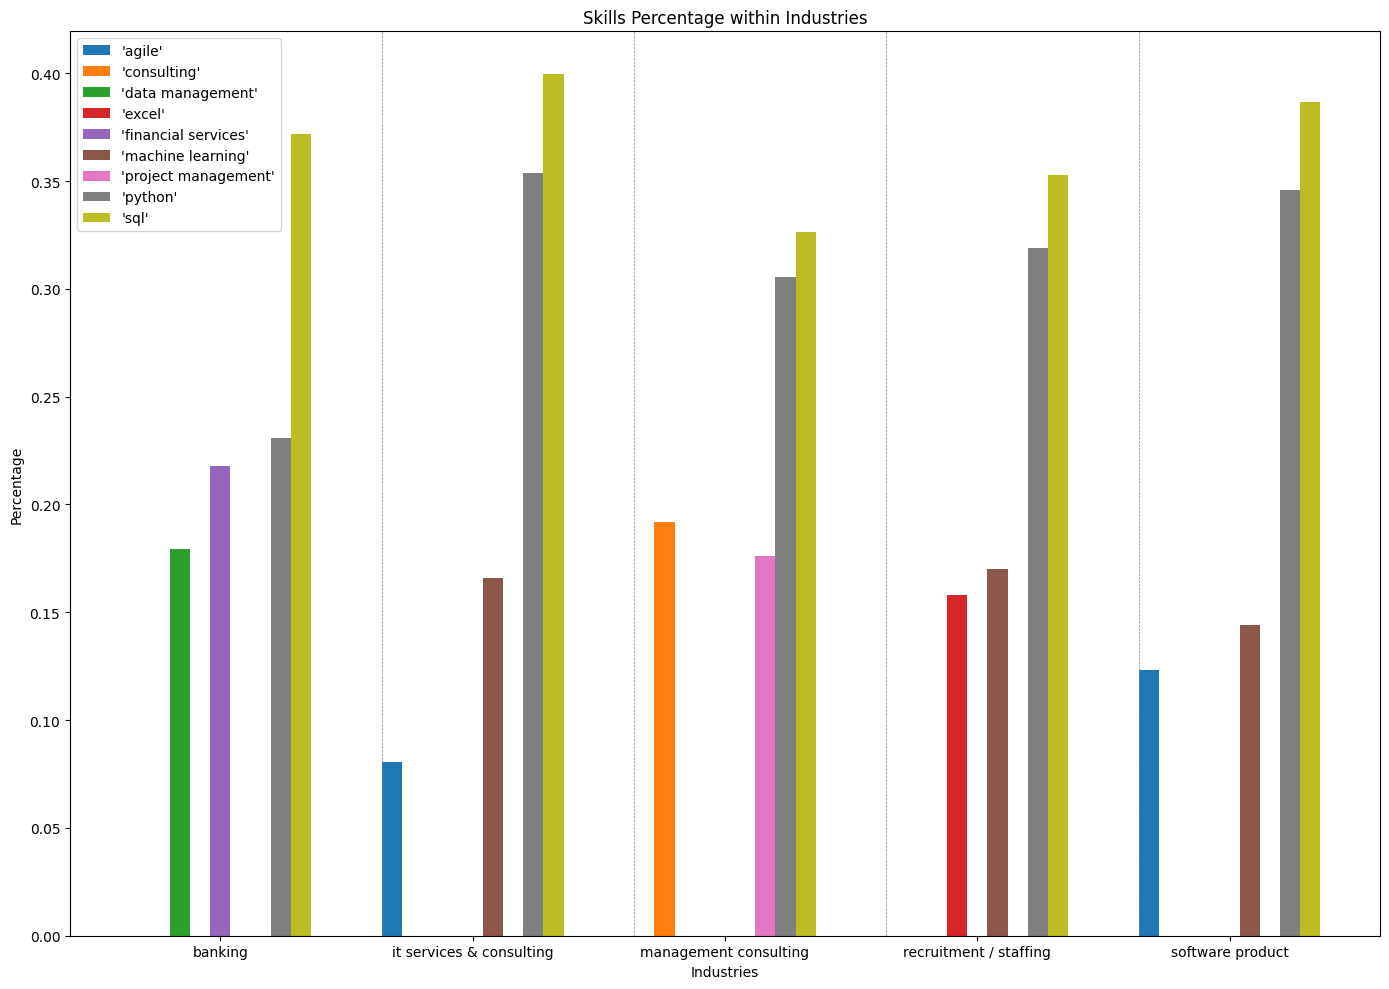

In [95]:
industries = industry_skill['industry'].unique()
skills = industry_skill['skill'].unique()



# Number of categories and subcategories
pivoted_data = industry_skill.pivot(index='industry', columns='skill', values='percentage').fillna(0)
industries = pivoted_data.index  # Extracting industries from the index
skills = pivoted_data.columns
# Number of categories and subcategories
num_industries = len(industries)
num_skills = len(skills)

# Generating random data for demonstration purposes
data = np.random.randint(1, 10, (num_industries, num_skills))  # Replace this with your actual data

# Width of each bar
bar_width = 0.08
index = np.arange(num_industries)

# Increase the size of the figure
plt.figure(figsize=(14, 10))  # Set the width and height of the figure

# Create bars for each skill (assuming data contains the percentage values for skills)
for i, skill in enumerate(skills):
    plt.bar(index + (i * bar_width), pivoted_data[skill], bar_width, label=skill)
for i in range(num_industries - 1):
    plt.axvline(x=(i + 1) - 0.5 * bar_width, color='gray', linestyle='--', linewidth=0.5)
# Adjusting x-axis labels and legend
plt.xlabel('Industries')
plt.ylabel('Percentage')
plt.title('Skills Percentage within Industries')
plt.xticks(index + bar_width * (num_skills - 1) / 2, industries)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

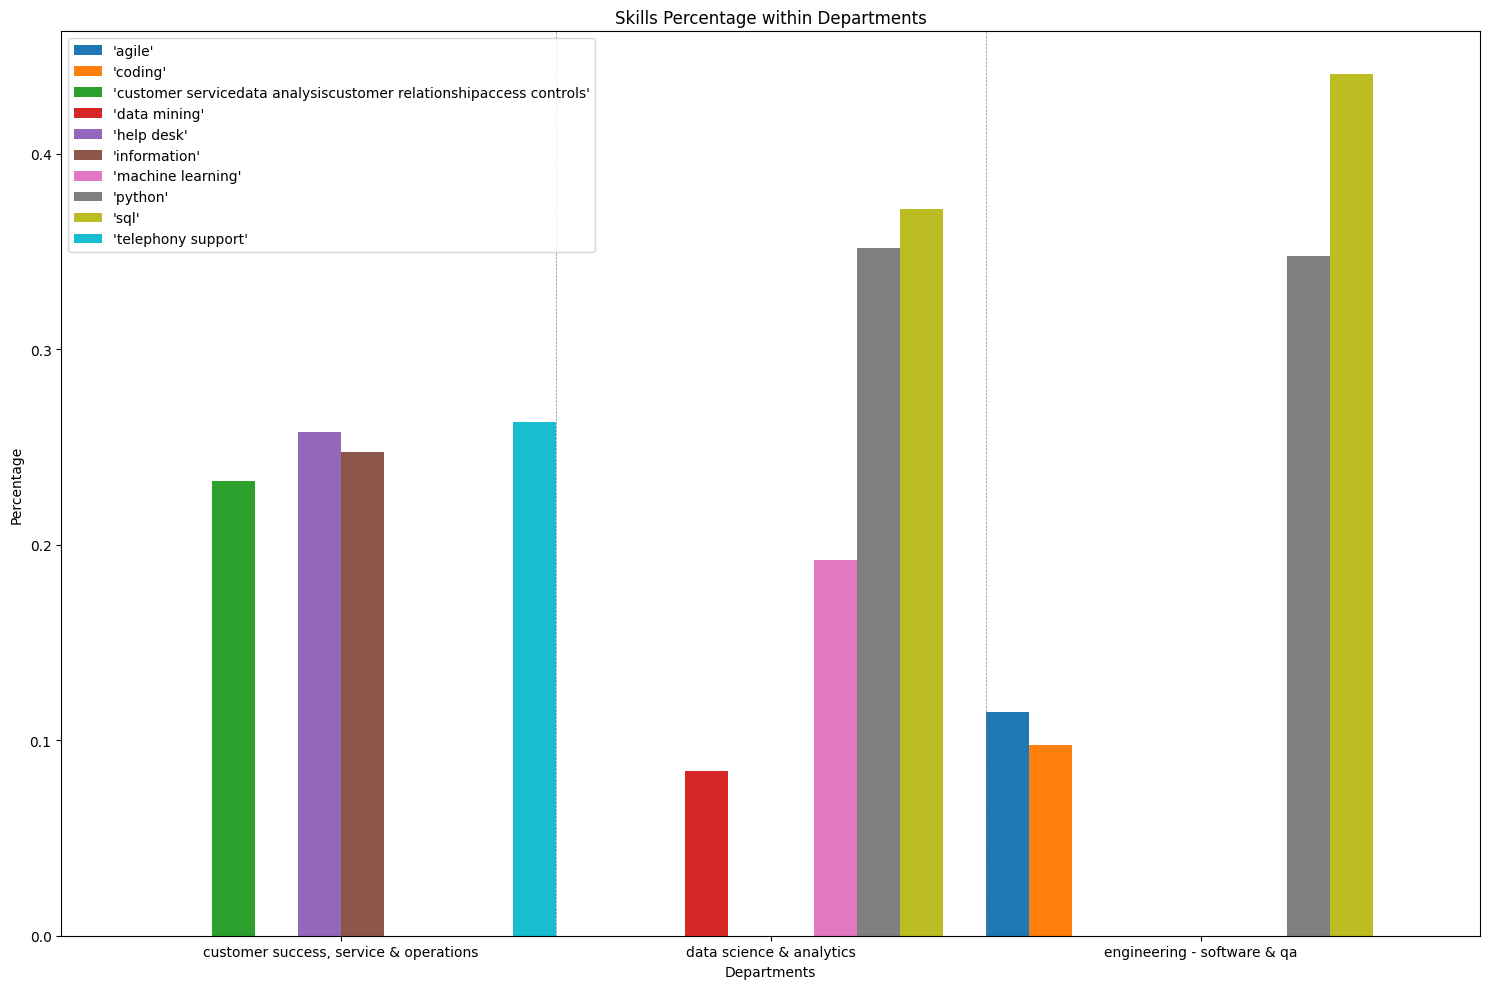

In [96]:
departments = dep_skill['department'].unique()
skills = dep_skill['skill'].unique()

# Number of categories and subcategories
pivoted_data = dep_skill.pivot(index='department', columns='skill', values='percentage').fillna(0)
industries = pivoted_data.index  # Extracting industries from the index
skills = pivoted_data.columns

# Number of categories and subcategories
num_industries = len(industries)
num_skills = len(skills)

# Generating random data for demonstration purposes
data = np.random.randint(1, 10, (num_industries, num_skills))  # Replace this with your actual data

# Width of each bar
bar_width = 0.1
index = np.arange(num_industries)

# Increase the size of the figure
plt.figure(figsize=(15, 10))  # Set the width and height of the figure

# Create bars for each skill with separation between groups
for i, skill in enumerate(skills):
    plt.bar(index + (i * bar_width), pivoted_data[skill], bar_width, label=skill)

# Draw gray lines separating groups of bars for each department
for i in range(num_industries - 1):
    plt.axvline(x=(i + 1) - 0.5 * bar_width, color='gray', linestyle='--', linewidth=0.5)

# Adjusting x-axis labels and legend
plt.xlabel('Departments')
plt.ylabel('Percentage')
plt.title('Skills Percentage within Departments')
plt.xticks(index + (num_skills - 1) * bar_width / 2, industries)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [97]:
word_to_count = {}
for index, row in df.iterrows():
    skills = row['key_skills_seperated_cleaned']
    count = row['applicants_count']
    
    for skill in skills.split():
        words = skill.split()
        cleaned_list = [s.replace("[", "").replace("]", "").replace("'", "").replace(",", "") for s in words]
        for word in cleaned_list:
            if word == "machine" or word == "learning":
                word = "machine learning"
            word_to_count[word] = count + word_to_count.get(word, 0)

In [98]:
from collections import defaultdict
import ast

flattened_dict = defaultdict(int)
for key, value in word_to_count.items():
    # Attempt to parse the key as a list
    try:
        parsed_key = ast.literal_eval(key)
        if isinstance(parsed_key, list):
            for k in parsed_key:
                flattened_dict[k] = max(flattened_dict[k], value)
        else:
            flattened_dict[key] = value
    except (ValueError, SyntaxError):
        flattened_dict[key] = value

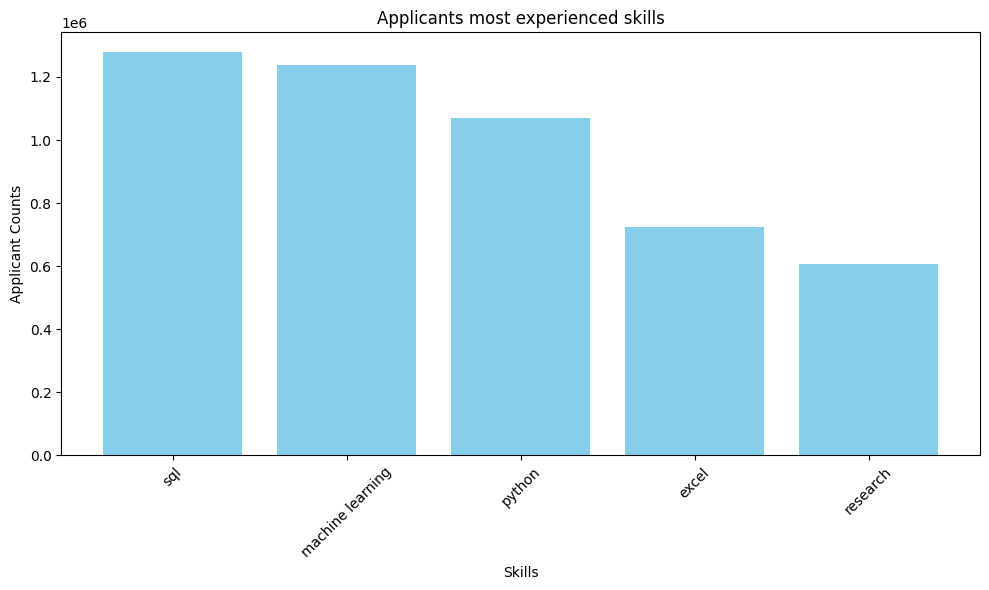

In [99]:
keys_to_remove = ['data', 'management', 'analysis', 'business']
for key in keys_to_remove:
    flattened_dict.pop(key, None)

# Get the top 5 largest values and their corresponding keys
top_keys = sorted(flattened_dict, key=flattened_dict.get, reverse=True)[:5]


top_values = [flattened_dict[key] for key in top_keys]

# Plot the top 5 largest values against keys
plt.figure(figsize=(10, 6))
plt.bar(top_keys, top_values, color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Applicant Counts')
plt.title('Applicants most experienced skills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
# Convert 'nan' strings to actual NaN values in 'company_name' column
df['company_name'] = df['company_name'].replace('nan', np.nan)

# Drop rows with NaN values in 'company_name'
filtered_df = df.dropna(subset=['company_name'])

# Grouping the data by company name and calculating the total number of applicants for each company
company_applicants = filtered_df.groupby('company_name')['applicants_count'].sum().reset_index()

# Sorting the companies based on the number of applicants in descending order
sorted_companies = company_applicants.sort_values(by='applicants_count', ascending=False)

# Selecting the top 3 companies with the highest number of applicants
top_3_companies = sorted_companies.head(5)

print(top_3_companies)

                                 company_name  applicants_count
962                              diverse lynx             63165
3382                          tiger analytics             45677
701   clinnovo research labs private limited.             40225
3780                                  zigram              34043
129                                    airtel             33087


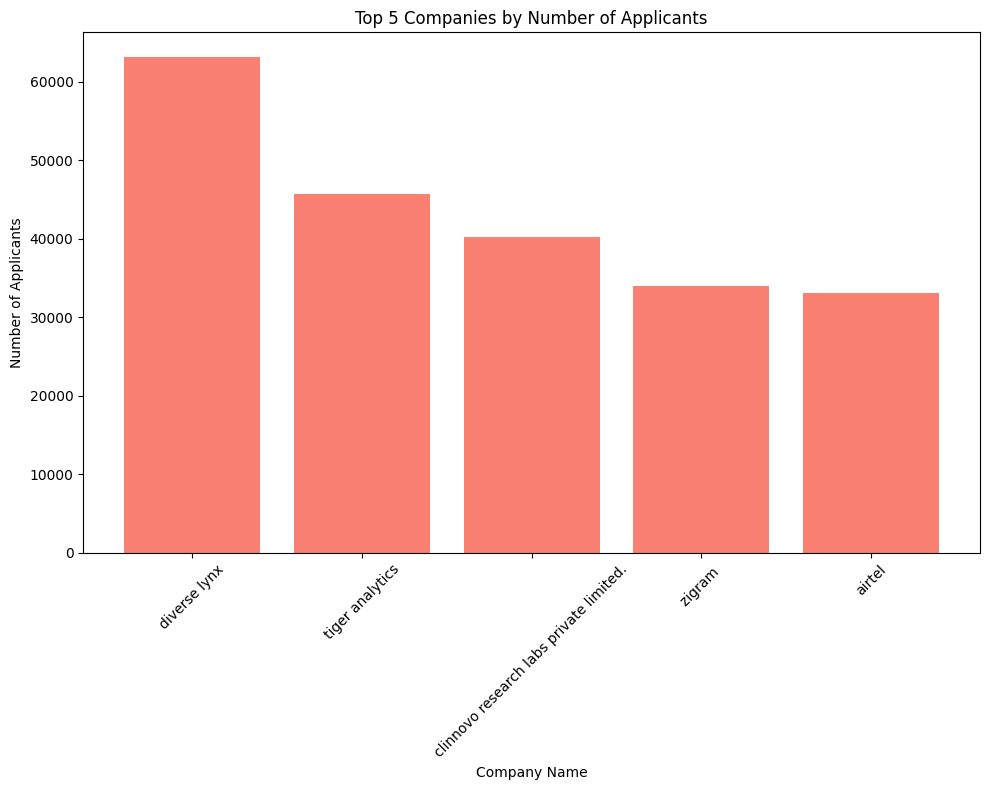

In [101]:
# Extracting company names and their respective number of applicants
company_names = top_3_companies['company_name']
applicants_count = top_3_companies['applicants_count']

# Creating a bar plot with a different color ('salmon' in this case)
plt.figure(figsize=(10, 8))
plt.bar(company_names, applicants_count, color='salmon')

# Adding labels and title
plt.xlabel('Company Name')
plt.ylabel('Number of Applicants')
plt.title('Top 5 Companies by Number of Applicants')

# Rotating x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()


In [102]:
departments = df['department']

# Counting the number of job postings per department
department_counts = departments.value_counts()

# Selecting the top 5 departments
top_5_departments = department_counts.head(5)

In [103]:
selected_columns = ['department', 'key_skills_seperated_cleaned']
relevant_data = df[selected_columns]

# Finding the top 5 departments
top_5_departments = df['department'].value_counts().head(2).index.tolist()

# Filtering data for the top 5 departments
top_5_departments_data = relevant_data[relevant_data['department'].isin(top_5_departments)]

# Splitting skills into separate rows
skills_list = top_5_departments_data['key_skills_seperated_cleaned'].explode()

# Counting skill frequencies per department
skill_frequency = skills_list.groupby(top_5_departments_data['department']).value_counts()

# Finding top 5 skills for each department
top_5_skills_by_department = skill_frequency.groupby(level=0).nlargest(2)

print("Top 5 Skills for Each of the Top 5 Departments:")
print(top_5_skills_by_department)


Top 5 Skills for Each of the Top 5 Departments:
department                   department                   key_skills_seperated_cleaned                                                                                                          
data science & analytics     data science & analytics     []                                                                                                                                         7
                                                          ['product management', 'business analyst', 'project management', 'market research', 'business operations', 'testing']                      6
engineering - software & qa  engineering - software & qa  ['shaping', 'standard operating procedures', 'software development life cycle', 'programming', 'mathematics', 'statistics', 'testing']    20
                                                          ['help deskdata analysiscustomer relationship', 'customeraccess controls', 'telephony support', 'vendor 

In [104]:
df_2023["key_skills_seperated_cleaned"] = df_2023["key_skills_seperated"].apply(remove_words_from_list, words_to_remove=words_to_remove)

In [105]:
df_2023['Skills/Description'] = df_2023['key_skills_seperated_cleaned'].apply(lambda x: ', '.join(x))

In [106]:
df_2023['Skills/Description']

0       Unix, Linux, Staffing, Time management, Projec...
1       j, Query, Silverlight, My, SQLSSRSJavascript, ...
2       FXData Engineeringdocumentationsystems enginee...
3       Leadership development, CSRExcel, Nutrition, P...
4       Web analytics, Social media, Strategic plannin...
                              ...                        
8969    IT Procurement, procurement managementdata ana...
8970    Data Science, Big Data, Data Engineeringdata s...
8972    BPOAccountancy, Tally, Back office, FMCGKPOITE...
8974    Valuation analysis, Interpersonal skills, Team...
8975    Process Associate, Automationdata sciencedata ...
Name: Skills/Description, Length: 8116, dtype: object

In [107]:
df_2023.rename(columns={'role': 'Job_Role'}, inplace=True)

In [108]:
df_2023.rename(columns={'Compane Name:': 'Company'}, inplace=True)

In [109]:
df_2023.rename(columns={'Jab Location:': 'Location'}, inplace=True)

In [110]:
df_2023.rename(columns={'key_skills_separated': 'Skills/Description'}, inplace=True)

In [111]:
def replace_pipe(skill_string):
    if isinstance(skill_string, str):  # Check if the value is a string
        return skill_string.replace('|', ', ')
    return skill_string

# Apply the function to the DataFrame column
df_nov_2022['Skills'] = df_nov_2022['Skills'].apply(replace_pipe)

In [112]:
# Convert all string values to lowercase
df_2023 = df_2023.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_may_2022 = df_may_2022.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_nov_2022 = df_nov_2022.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [113]:
words_to_remove = ['it skills', 'computer science', 'data science', 'artificial intelligence', 'data analysis', 'analytical', 'sqlpython']

# Define a function to remove words from the string
def remove_words(skill_string, words_to_remove):
    if isinstance(skill_string, str):
        skills = [skill.strip() for skill in skill_string.split(',') if skill.strip() not in words_to_remove]
        return ', '.join(skills)
    return skill_string


# Apply the function to the DataFrame column
df_may_2022['Skills/Description'] = df_may_2022['Skills/Description'].apply(remove_words, words_to_remove=words_to_remove)
df_nov_2022['Skills'] = df_nov_2022['Skills'].apply(remove_words, words_to_remove=words_to_remove)
df_2023['Skills/Description'] = df_2023['Skills/Description'].apply(remove_words, words_to_remove=words_to_remove)

In [117]:
# Extract top skills for each dataset
top_skills_may_2022 = df_may_2022['Skills/Description'].str.split(', ').explode().value_counts().index[:10]
top_skills_nov_2022 = df_nov_2022['Skills'].str.split(', ').explode().value_counts().index[:10]
top_skills_2023 = df_2023['Skills/Description'].str.split(', ').explode().value_counts().index[:10]

# Skills added in Nov 2022 compared to May 2022
skills_added_nov = set(top_skills_nov_2022) - set(top_skills_may_2022)

# Skills added in 2023 compared to Nov 2022
skills_added_2023 = set(top_skills_2023) - set(top_skills_nov_2022)


common_skills = set(top_skills_may_2022) & set(top_skills_2023) & set(top_skills_nov_2022)

print("Common top skills:", common_skills)
print("Skills Added in Nov 2022:", skills_added_nov)
print("Skills Added in 2023:", skills_added_2023)



Common top skills: {'machine learning', 'python', 'data management', 'sql'}
Skills Added in Nov 2022: {'r', 'tableau', 'nlp', 'data analytics'}
Skills Added in 2023: {'operations', 'agile', 'excel', 'automation', 'ms office', 'project management'}
